In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from operator import add

%matplotlib inline

## Datasets greffe pulmonaire EDA, Visualization and Prediction
*L'ensemble de données de prédiction de la greffe pulmonaire est une collection de données médicales et démographiques de patients, ainsi que leur statut de greffe pulmonaire (positif ou négatif). Les données comprennent des caractéristiques telles que l'âge, le sexe, l'indice de masse corporelle (BMI), la PAPM (pression artérielle pulmonaire moyenne), les maladies cardiaques, les bronchiques, le diabète pré-opératoire, l'insuffisance rénale aiguë, la Pneumonie etc... Cet ensemble de données peut être utilisé pour construire des modèles d'apprentissage automatique afin de prédire le risque de mortalité à un an après la greffe pulmonaire chez les patients sur la base de leurs antécédents médicaux et de leurs informations démographiques. Les professionnels de la santé peuvent ainsi identifier les patients susceptibles de développer une greffe pulmonaire et élaborer des plans de traitement personnalisés. En outre, l'ensemble de données peut être utilisé par les chercheurs pour explorer les relations entre divers facteurs médicaux et démographiques et la probabilité de développer une greffe pulmonaire.*

## Features

* **Le sexe** : Le sexe fait référence au sexe biologique de l'individu, qui peut avoir un impact sur sa susceptibilité à la greffe pulmonaire.

* **Âge** : l'âge est un facteur important car la greffe pulmonaire est plus souvent diagnostiqué chez les adultes plus âgés. L'âge est compris entre 15 et 71 dans notre base de données.

* **Maladie cardiaque** : Les maladies cardiaques sont une autre condition médicale associée à un risque accru de développer une greffe pulmonaire.
    IMC (indice de masse corporelle) : L'IMC (indice de masse corporelle) est une mesure de la graisse corporelle basée sur le poids et la taille. Les patients dont l'IMC est élevé sont connus pour avoir plus de risques de souffrir de la greffe pulmonaire.

* **Diabète pré-opératoire** : Il indique que la personne souffre de diabète avant de subir une opération. Cette information est importante car le diabète pré-existant peut influencer la gestion de l'anesthésie, la prise en charge péri-opératoire et les soins post-opératoires du patient.

* **L'insuffisance rénale aiguë** : il peut être une complication fréquente après une greffe pulmonaire, et sa survenue est multifactorielle, tels que la durée de l'intervention, l'utilisation de perfusions intraveineuses, l'hypotension pendant l'opération et la perte sanguine.

* **La pneumonie** : la pneumonie est une infection des poumons qui peut survenir chez les personnes greffées pulmonaires. Après une greffe pulmonaire, les patients sont susceptibles d'avoir un système immunitaire affaibli en raison des médicaments immunosuppresseurs qu'ils prennent pour prévenir le rejet du greffon. Cela peut rendre les patients plus vulnérables aux infections pulmonaires, y compris la pneumonie.

* **les bronchiques** : Après une greffe pulmonaire, des complications liées aux bronches peuvent survenir. Il est possible que des problèmes tels que la sténose bronchique (rétrécissement des bronches), l'infection des bronches ou la bronchiolite oblitérante (rétrécissement et obstruction des petites voies respiratoires) se produisent chez certains patients greffés pulmonaires.


In [36]:
#Load the dataset as 'df'
data = pd.read_excel("/content/Base de donnees greffe pulmonaire_Ian.xlsx")
data = data.drop(['Unnamed: 0', 'NIP (identifiant)', 'date de TP','mortalité à 90j','mortalité à J30'], axis = 1)
data.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Age  Sexe (0=F, 1=M)  BMI (body mass index)  BMI< ou egal 18  BMI>30  \
0   52                0                   26.0                0       0   
1   63                1                   18.0                1       0   
2   45                1                   31.0                0       1   
3   56                0                   28.0                0       0   
4   63                0                   20.0                0       0   

   BMI>25  cardiopathie ischémique  diabètepré-opératoire  \
0       1                        0                      1   
1       0                        0                      0   
2       1                        0                      0   
3       1                        0                      0   
4       0                        0                      0   

   PAPM (pression artérielle pulmonaire moyenne)  étiologie BPCO  ...  \
0                                            NaN               0  ...   
1                                           29.0               1  ...   
2                                           25.0               0  ...   
3                                           16.0               0  ...   
4                                           16.0               0  ...   

   Pneumonie acquise sous ventilation mécanique à BLSE et/ou Pyo  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  1               
4                                                  0               

   Trachéotomie  Sténose bronchique grave dans l'année (stent ou dilatation)  \
0             1                                                  0             
1             0                                                  0             
2             0                                                  1             
3             1                                                  1             
4             0                                                  1             

   Fistule bronchique dans l'année  rejet humoral dans l'année  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                1                           0   
4                                0                           0   

   rejet cellulaire dans l'année   pleurésie <1an  \
0                             0.0             0.0   
1                             0.0             0.0   
2                             0.0             NaN   
3                             0.0             0.0   
4                             0.0             0.0   

   durée de séjour en réanimation (1er séjour)  \
0                                           56   
1                                           12   
2                                           21   
3                                           51   
4                                           10   

   mortalité dans le premier séjour réanimation  mortalité à un an  
0                                             0                  0  
1                                             0                  0  
2                                             0                  0  
3                                             0                  0  
4                                             0                  0  

[5 rows x 42 columns]

In [37]:
data.columns

Index(['Age', 'Sexe (0=F, 1=M)', 'BMI (body mass index)', 'BMI< ou egal 18',
       'BMI>30', 'BMI>25', 'cardiopathie ischémique', 'diabètepré-opératoire',
       'PAPM (pression artérielle pulmonaire moyenne)', 'étiologie BPCO',
       'étiologie Fibrose', 'Autres étiologies', 'Mismatch CMV (R-/D+)',
       'ECMO pré-opératoire', 'Super Urgence',
       'type de TP (0=monopulmonaire, 1=bipulmonaire)', 'Ischémie Froide Max',
       'Analgésie péridurale ', 'ECMO peropératoire ',
       'Transfusion per opératoire >2 CGR', 'SOFA J0', 'IGS2 J0',
       'Nb Jours Noradrénaline ', 'Nb Jours Ventilation mécanique',
       'ECMO en Réanimation', 'Nb jours d'ECMO en réanimation',
       'Dysfonction primaire du greffon grade 3 ', 'insuffisance rénale aiguë',
       'dialyse en réanimation', 'bactériémie', 'Pneumonie (tous germes)',
       'Pneumonie à BLSE et/ou Pyo en réanimation',
       'Pneumonie acquise sous ventilation mécanique à BLSE et/ou Pyo',
       'Trachéotomie',
       'Sténose 

### ***Variables manquante***
La gestion des données manquantes est importante car de nombreux algorithmes d'apprentissage automatique ne prennent pas en charge les données avec des valeurs manquantes.

In [38]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'Le pourcentage des valeurs manquantes est :  {round(total_percentage,2)}%')

Le pourcentage des valeurs manquantes est :  20.63%


In [39]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

Total  Percentage
PAPM (pression artérielle pulmonaire moyenne)     23    9.126984
Ischémie Froide Max                                9    3.571429
Nb Jours Noradrénaline                             6    2.380952
pleurésie <1an                                     5    1.984127
Transfusion per opératoire >2 CGR                  2    0.793651
Autres étiologies                                  2    0.793651
Mismatch CMV (R-/D+)                               1    0.396825
rejet cellulaire dans l'année                      1    0.396825
Pneumonie (tous germes)                            1    0.396825
Analgésie péridurale                               1    0.396825
Super Urgence                                      1    0.396825

In [40]:
#data = data.fillna(data.mean())

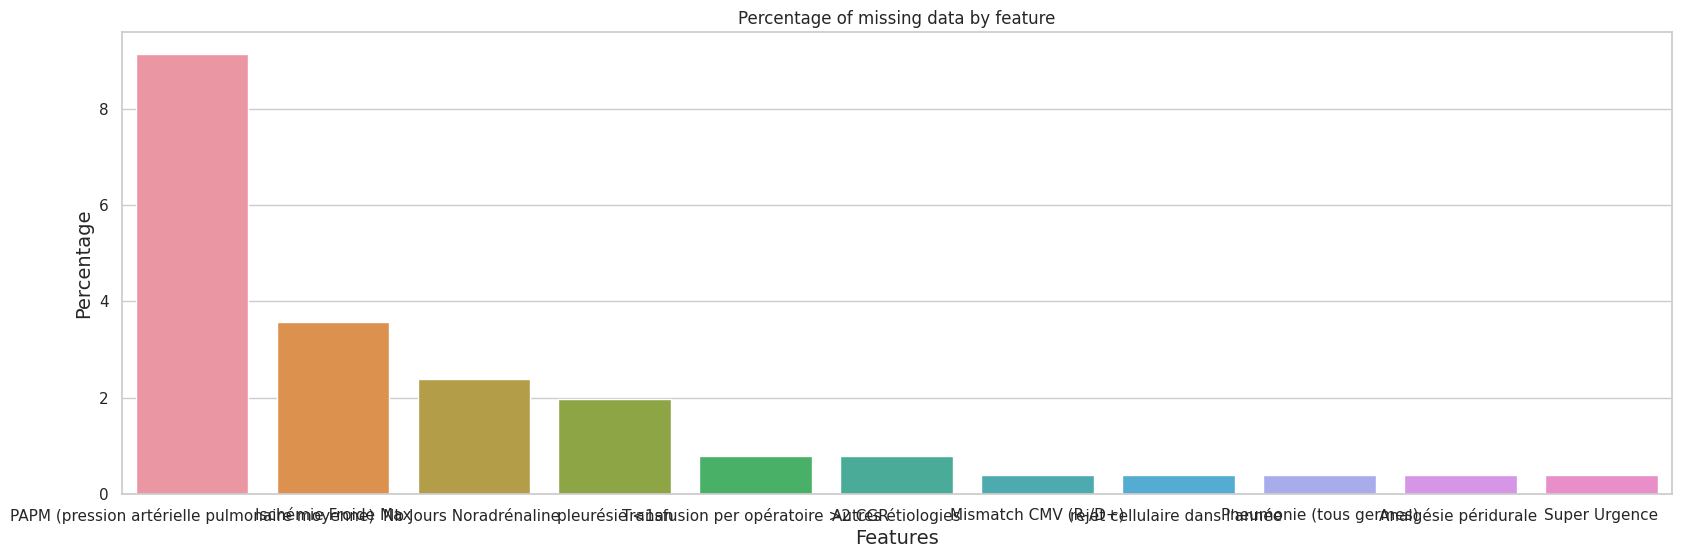

In [41]:
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

*À 9,12 %, l'entrée de la PAPM (pression artérielle pulmonaire moyenne) présente le pourcentage le plus élevé de données manquantes. Les autres caractéristiques ont très peu d'entrées manquantes.
Étant donné que les entrées manquantes ne représentent que 20,63 % du total des données, nous pouvons interpoler ces entrées sans perdre beaucoup de données.*

In [42]:
data=data.interpolate()
data = data.fillna(data.mean())

In [43]:
data.shape

(252, 42)

**Data Distribution**

<ipython-input-44-282c9ec7af48>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


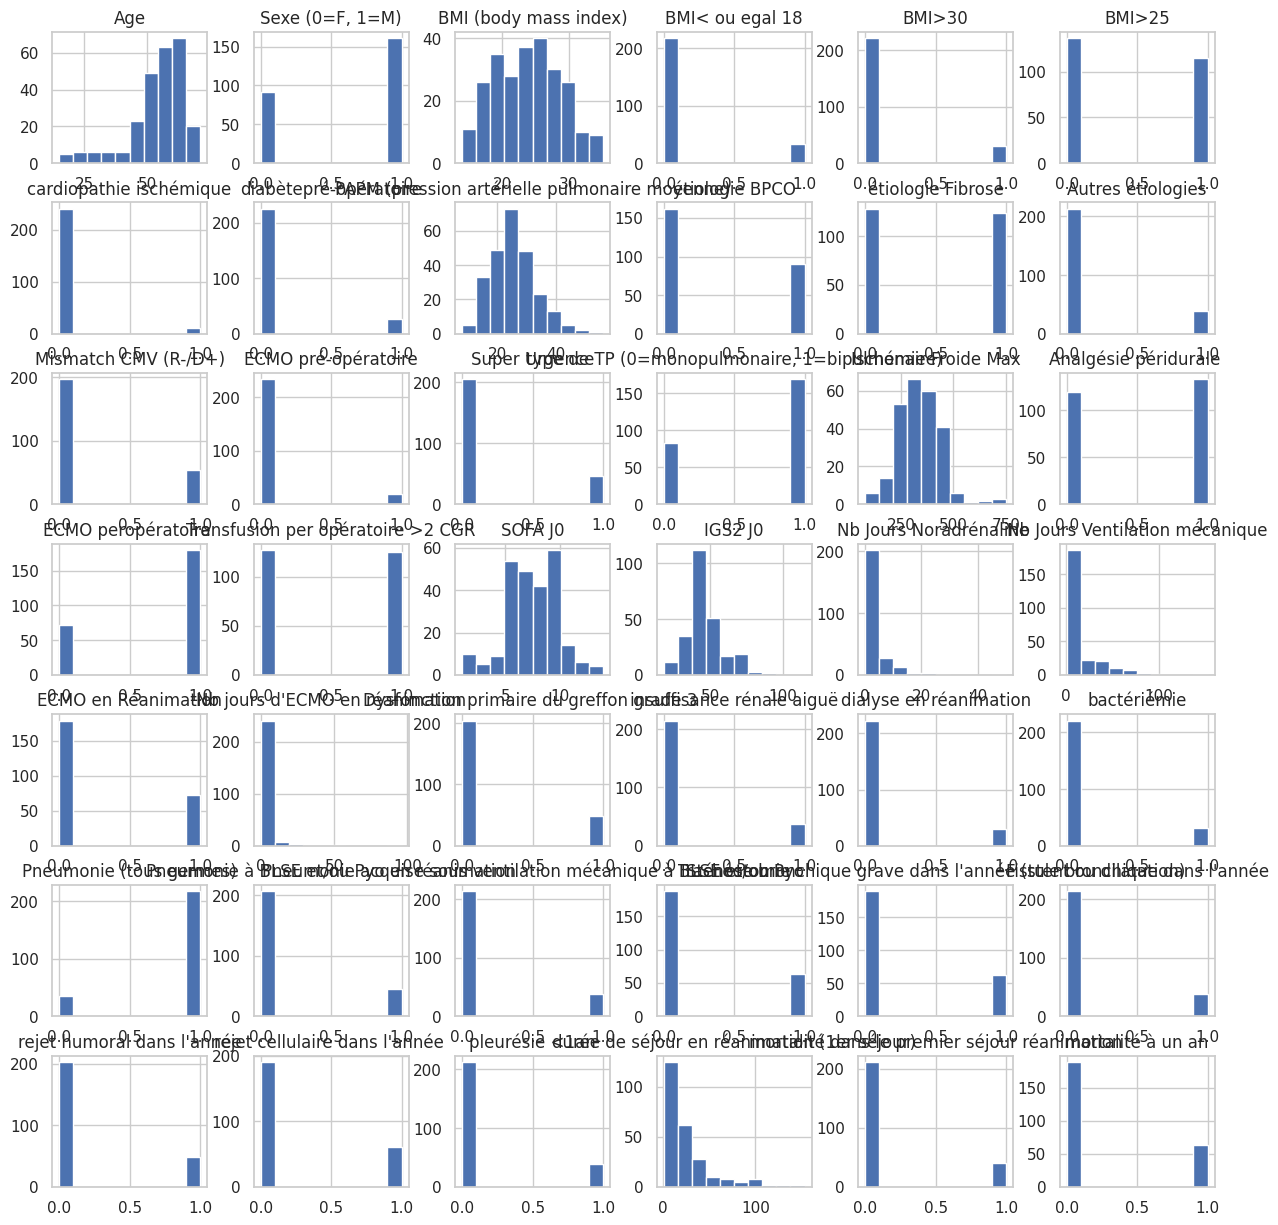

In [44]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

*Les données sur le rejet humoral dans l'année, la pneumonie et les maladies sont mal équilibrées.*

**Case counts**

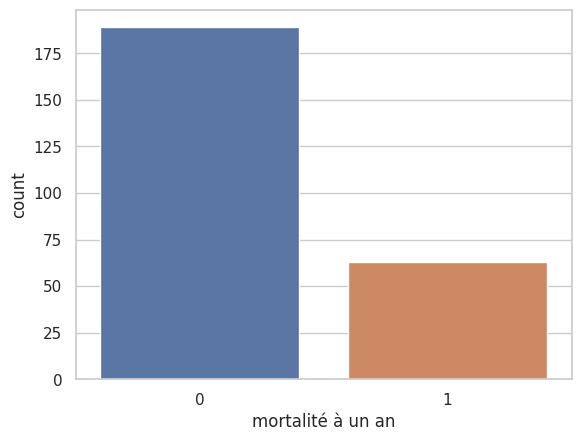

Il y'a 189 patients qui ont survecu et 63 patients qui sont morts


In [45]:
sns.countplot(x='mortalité à un an',data=data)
plt.show()
cases = data['mortalité à un an'].value_counts()
print(f"Il y'a {cases[0]} patients qui ont survecu et {cases[1]} patients qui sont morts")

*Les données ne sont pas correctement équilibrées car le nombre de personnes qui ont survecu à un an dépasse largement le nombre de personnes qui sont morts à un an. Le rapport est d'environ 1 pour 3.*

**Categorical variable comparisons**

In [46]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()

    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)

    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)

    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

<ipython-input-46-821911d9fa96>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
<ipython-input-46-821911d9fa96>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
<ipython-input-46-821911d9fa96>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
<ipython-input-46-821911d9fa96>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])
<ipython-input-46-821911d9fa96>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])


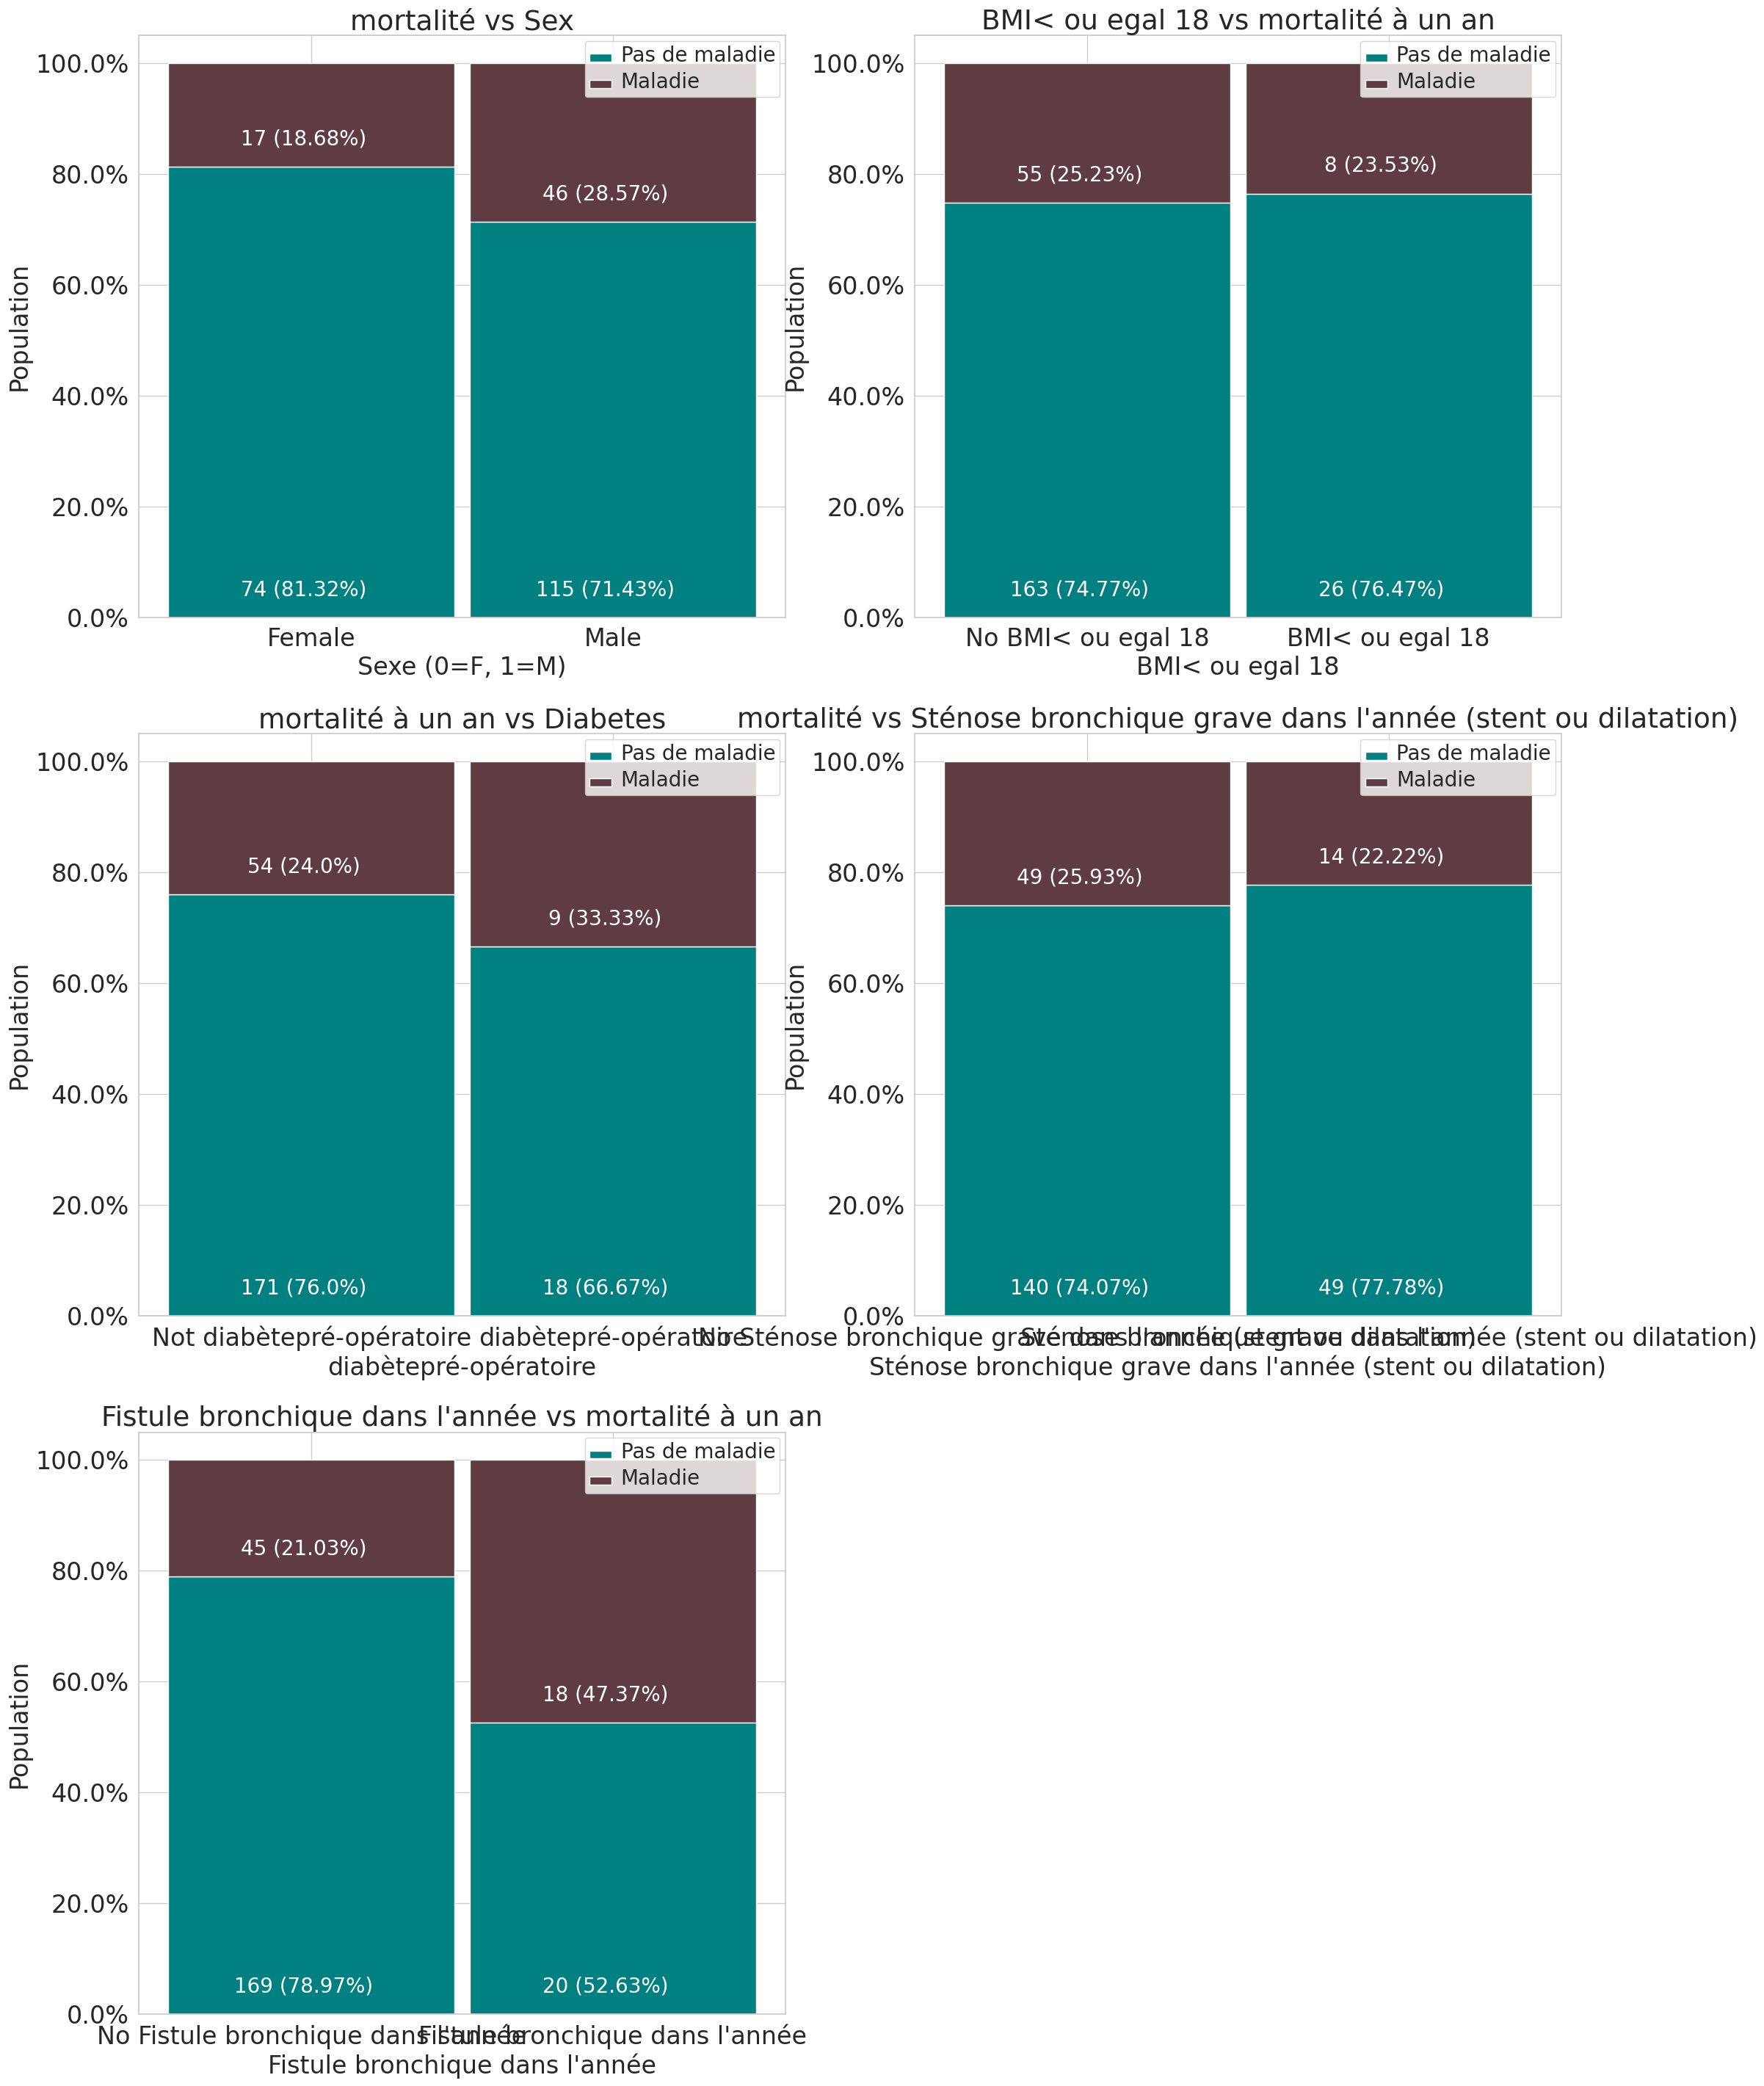

In [47]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

# Représentation du sexe par rapport au résultat de la maladie.
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['Sexe (0=F, 1=M)','mortalité à un an']].groupby(['Sexe (0=F, 1=M)','mortalité à un an']).size().unstack('mortalité à un an')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'Pas de maladie', 1:'Maladie'}, inplace = True)
stacked_barchart(temp, title = 'mortalité vs Sex', ylabel = 'Population')

# Représentation du BMI< ou egal 18 par rapport au résultat de la maladie.
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['BMI< ou egal 18','mortalité à un an']].groupby(['BMI< ou egal 18','mortalité à un an']).size().unstack('mortalité à un an')
temp.rename(index={0:'No BMI< ou egal 18', 1:'BMI< ou egal 18'}, columns={0:'Pas de maladie', 1:'Maladie'}, inplace = True)
stacked_barchart(temp, title = 'BMI< ou egal 18 vs mortalité à un an', ylabel = 'Population')

# Représentation du diabètepré-opératoire par rapport au résultat de la maladie.
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabètepré-opératoire','mortalité à un an']].groupby(['diabètepré-opératoire','mortalité à un an']).size().unstack('mortalité à un an')
temp.rename(index={0:'Not diabètepré-opératoire', 1:'diabètepré-opératoire'}, columns={0:'Pas de maladie', 1:'Maladie'}, inplace = True)
stacked_barchart(temp, title = 'mortalité à un an vs Diabetes', ylabel = 'Population')

# Représentation du Sténose bronchique grave dans l'année (stent ou dilatation) par rapport au résultat de la maladie.
plt.subplot(grid_rows, grid_cols, 4)
temp = data[["Sténose bronchique grave dans l'année (stent ou dilatation)",'mortalité à un an']].groupby(["Sténose bronchique grave dans l'année (stent ou dilatation)",'mortalité à un an']).size().unstack('mortalité à un an')
temp.rename(index={0:"No Sténose bronchique grave dans l'année (stent ou dilatation)", 1:"Sténose bronchique grave dans l'année (stent ou dilatation)"}, columns={0:'Pas de maladie', 1:'Maladie'}, inplace = True)
stacked_barchart(temp, title = "mortalité vs Sténose bronchique grave dans l'année (stent ou dilatation)", ylabel = 'Population')

# Représentation du Fistule bronchique dans l'année par rapport au résultat de la maladie.
plt.subplot(grid_rows, grid_cols, 5)
temp = data[["Fistule bronchique dans l'année",'mortalité à un an']].groupby(["Fistule bronchique dans l'année",'mortalité à un an']).size().unstack('mortalité à un an')
temp.rename(index={0:"No Fistule bronchique dans l'année", 1:"Fistule bronchique dans l'année"}, columns={0:'Pas de maladie', 1:'Maladie'}, inplace = True)
stacked_barchart(temp, title = "Fistule bronchique dans l'année vs mortalité à un an", ylabel = 'Population')

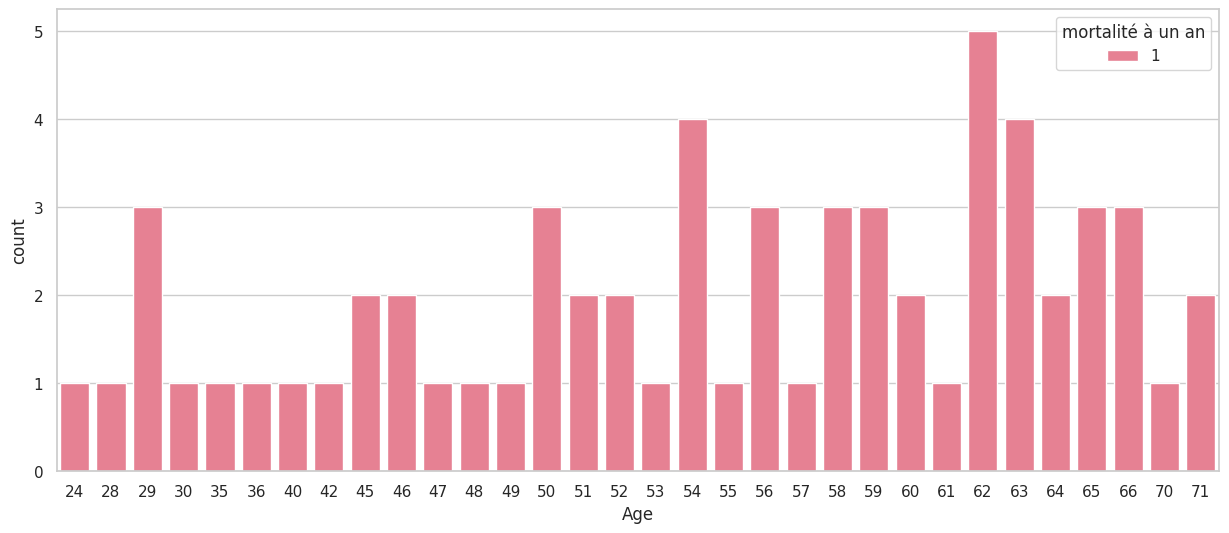

In [48]:
positive_cases = data[data['mortalité à un an'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data = positive_cases, hue = 'mortalité à un an', palette='husl')
plt.show()

*Les personnes présentant le risque le plus élevé de développer une mortalité à un an du greffe pulmonaire sont âgées entre 54 et 62 ans. Le nombre de personnes malades augmente généralement avec l'âge.*

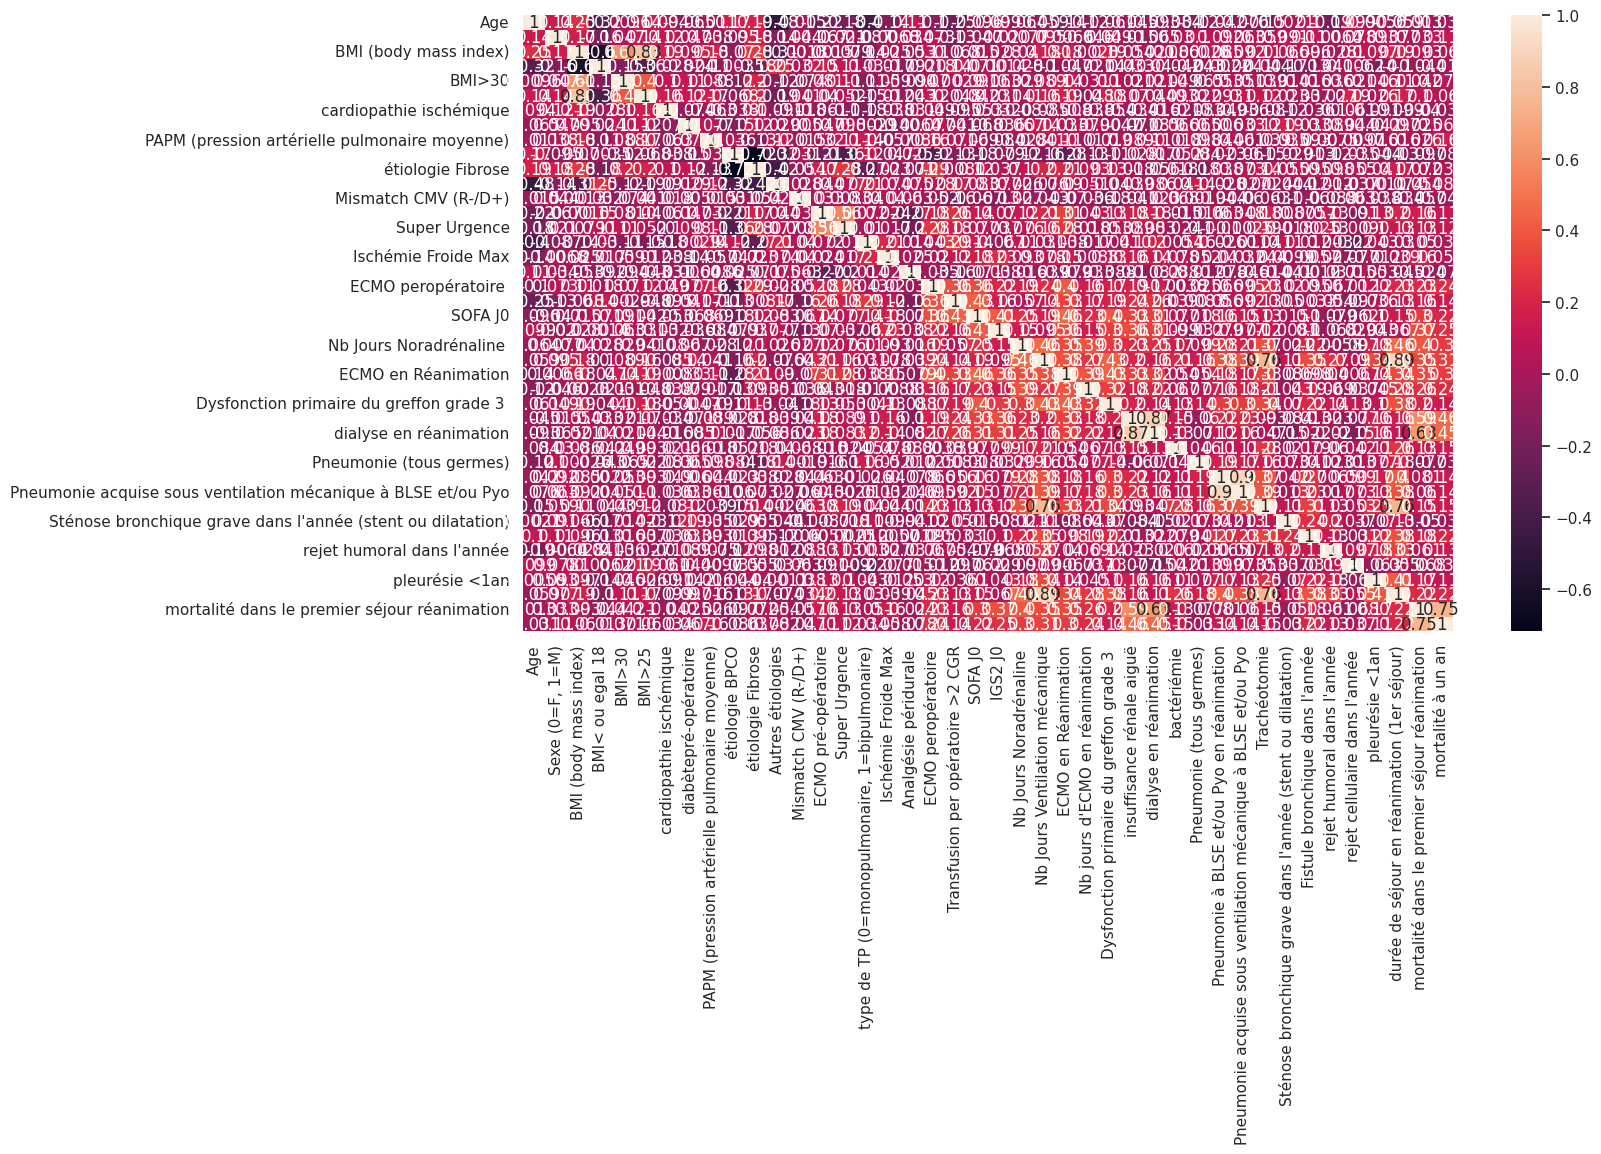

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Feature Selection**

*Ici, nous utiliserons l'algorithme Boruta, qui est construit autour de l'algorithme de classification de la forêt aléatoire. Il essaie de capturer toutes les caractéristiques importantes et intéressantes dans un ensemble de données par rapport à une variable de résultat.
Méthodologie :*

* Tout d'abord, il ajoute de l'aléatoire à l'ensemble de données donné en créant des copies mélangées de toutes les caractéristiques (appelées "shadow features" ou caractéristiques d'ombre).

* Ensuite, il entraîne un classificateur de forêt aléatoire sur l'ensemble de données étendu et applique une mesure d'importance des caractéristiques (la valeur par défaut est "Mean Decrease Accuracy" ou diminution moyenne de précision) pour évaluer l'importance de chaque caractéristique, où une valeur plus élevée signifie qu'elle est plus importante.

* À chaque itération, il vérifie si une caractéristique réelle a une importance plus élevée que la meilleure des caractéristiques d'ombre correspondantes (c'est-à-dire si la caractéristique a un score Z plus élevé que le score Z maximum de ses caractéristiques d'ombre) et élimine constamment les caractéristiques qui sont considérées comme très peu importantes.

* Enfin, l'algorithme s'arrête lorsque toutes les caractéristiques sont confirmées ou rejetées, ou lorsqu'il atteint une limite spécifiée de tentatives de forêt aléatoire.

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [52]:
from sklearn.ensemble import RandomForestClassifier
#from boruta import BorutaPy

In [53]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [54]:
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	33
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	33
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	33
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	33
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	33
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	33
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	33
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	33
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=31, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7C626418F640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7C626418F640, verbose=2)

In [55]:
# Affichage des caractéristiques les plus importantes.
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['IGS2 J0',
 'Nb Jours Ventilation mécanique',
 'durée de séjour en réanimation (1er séjour)',
 'mortalité dans le premier séjour réanimation']

In [56]:
# Sélectionnez les 6 caractéristiques les plus importantes.
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['PAPM (pression artérielle pulmonaire moyenne)',
 'Ischémie Froide Max',
 'IGS2 J0',
 'Nb Jours Noradrénaline ',
 'Nb Jours Ventilation mécanique',
 'insuffisance rénale aiguë',
 'dialyse en réanimation',
 'durée de séjour en réanimation (1er séjour)',
 'mortalité dans le premier séjour réanimation']

*Nous constatons que l'âge et la pression artérielle systolique sont sélectionnés comme les caractéristiques les plus importantes pour prédire le risque de développer une coronaropathie (CHD) sur dix ans.
Cependant, nous utiliserons les six caractéristiques les plus importantes pour construire nos modèles.*

In [57]:
import statsmodels.api as sm

In [58]:
X_top = data[top_features]
y = data['mortalité à un an']

In [59]:
res = sm.Logit(y,X_top).fit()
res.summary()

         Current function value: 0.263451
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      mortalité à un an   No. Observations:                  252
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                            8
Date:                Sun, 30 Jul 2023   Pseudo R-squ.:                  0.5315
Time:                        22:52:08   Log-Likelihood:                -66.390
converged:                      False   LL-Null:                       -141.71
Covariance Type:            nonrobust   LLR p-value:                 1.443e-28
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
PAPM (pression artérielle pulmonaire moyenne)     0.0469      0.025      1.851      0.064      -0.003       0.097
Ischémie Froide Max                              -0.0059      0.002     -2.468      0.014      -0.011      -0.001
IGS2 J0                                          -0.0393      0.019     -2.075      0.038      -0.076      -0.002
Nb Jours Noradrénaline                           -0.0662      0.109     -0.609      0.542      -0.279       0.147
Nb Jours Ventilation mécanique                    0.0095      0.028      0.336      0.737      -0.046       0.065
insuffisance rénale aiguë                         1.6549      1.065      1.553      0.120      -0.433       3.743
dialyse en réanimation                          -19.1104   7426.749     -0.003      0.998   -1.46e+04    1.45e+04
durée de séjour en réanimation (1er séjour)       0.0074      0.025      0.299      0.765      -0.041       0.056
mortalité dans le premier séjour réanimation     49.2887   1.87e+05      0.000      1.000   -3.67e+05    3.67e+05
=================================================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [60]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                                     5%        95%  \
PAPM (pression artérielle pulmonaire moyenne)  0.997240   1.101486   
Ischémie Froide Max                            0.989530   0.998794   
IGS2 J0                                        0.926454   0.997817   
Nb Jours Noradrénaline                         0.756463   1.158079   
Nb Jours Ventilation mécanique                 0.955000   1.067250   
insuffisance rénale aiguë                      0.648440  42.227917   
dialyse en réanimation                         0.000000        inf   
durée de séjour en réanimation (1er séjour)    0.959602   1.057669   
mortalité dans le premier séjour réanimation   0.000000        inf   

                                                 Odds Ratio  
PAPM (pression artérielle pulmonaire moyenne)  1.048068e+00  
Ischémie Froide Max                            9.941514e-01  
IGS2 J0                                        9.614737e-01  
Nb Jours Noradrénaline                         9.35

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

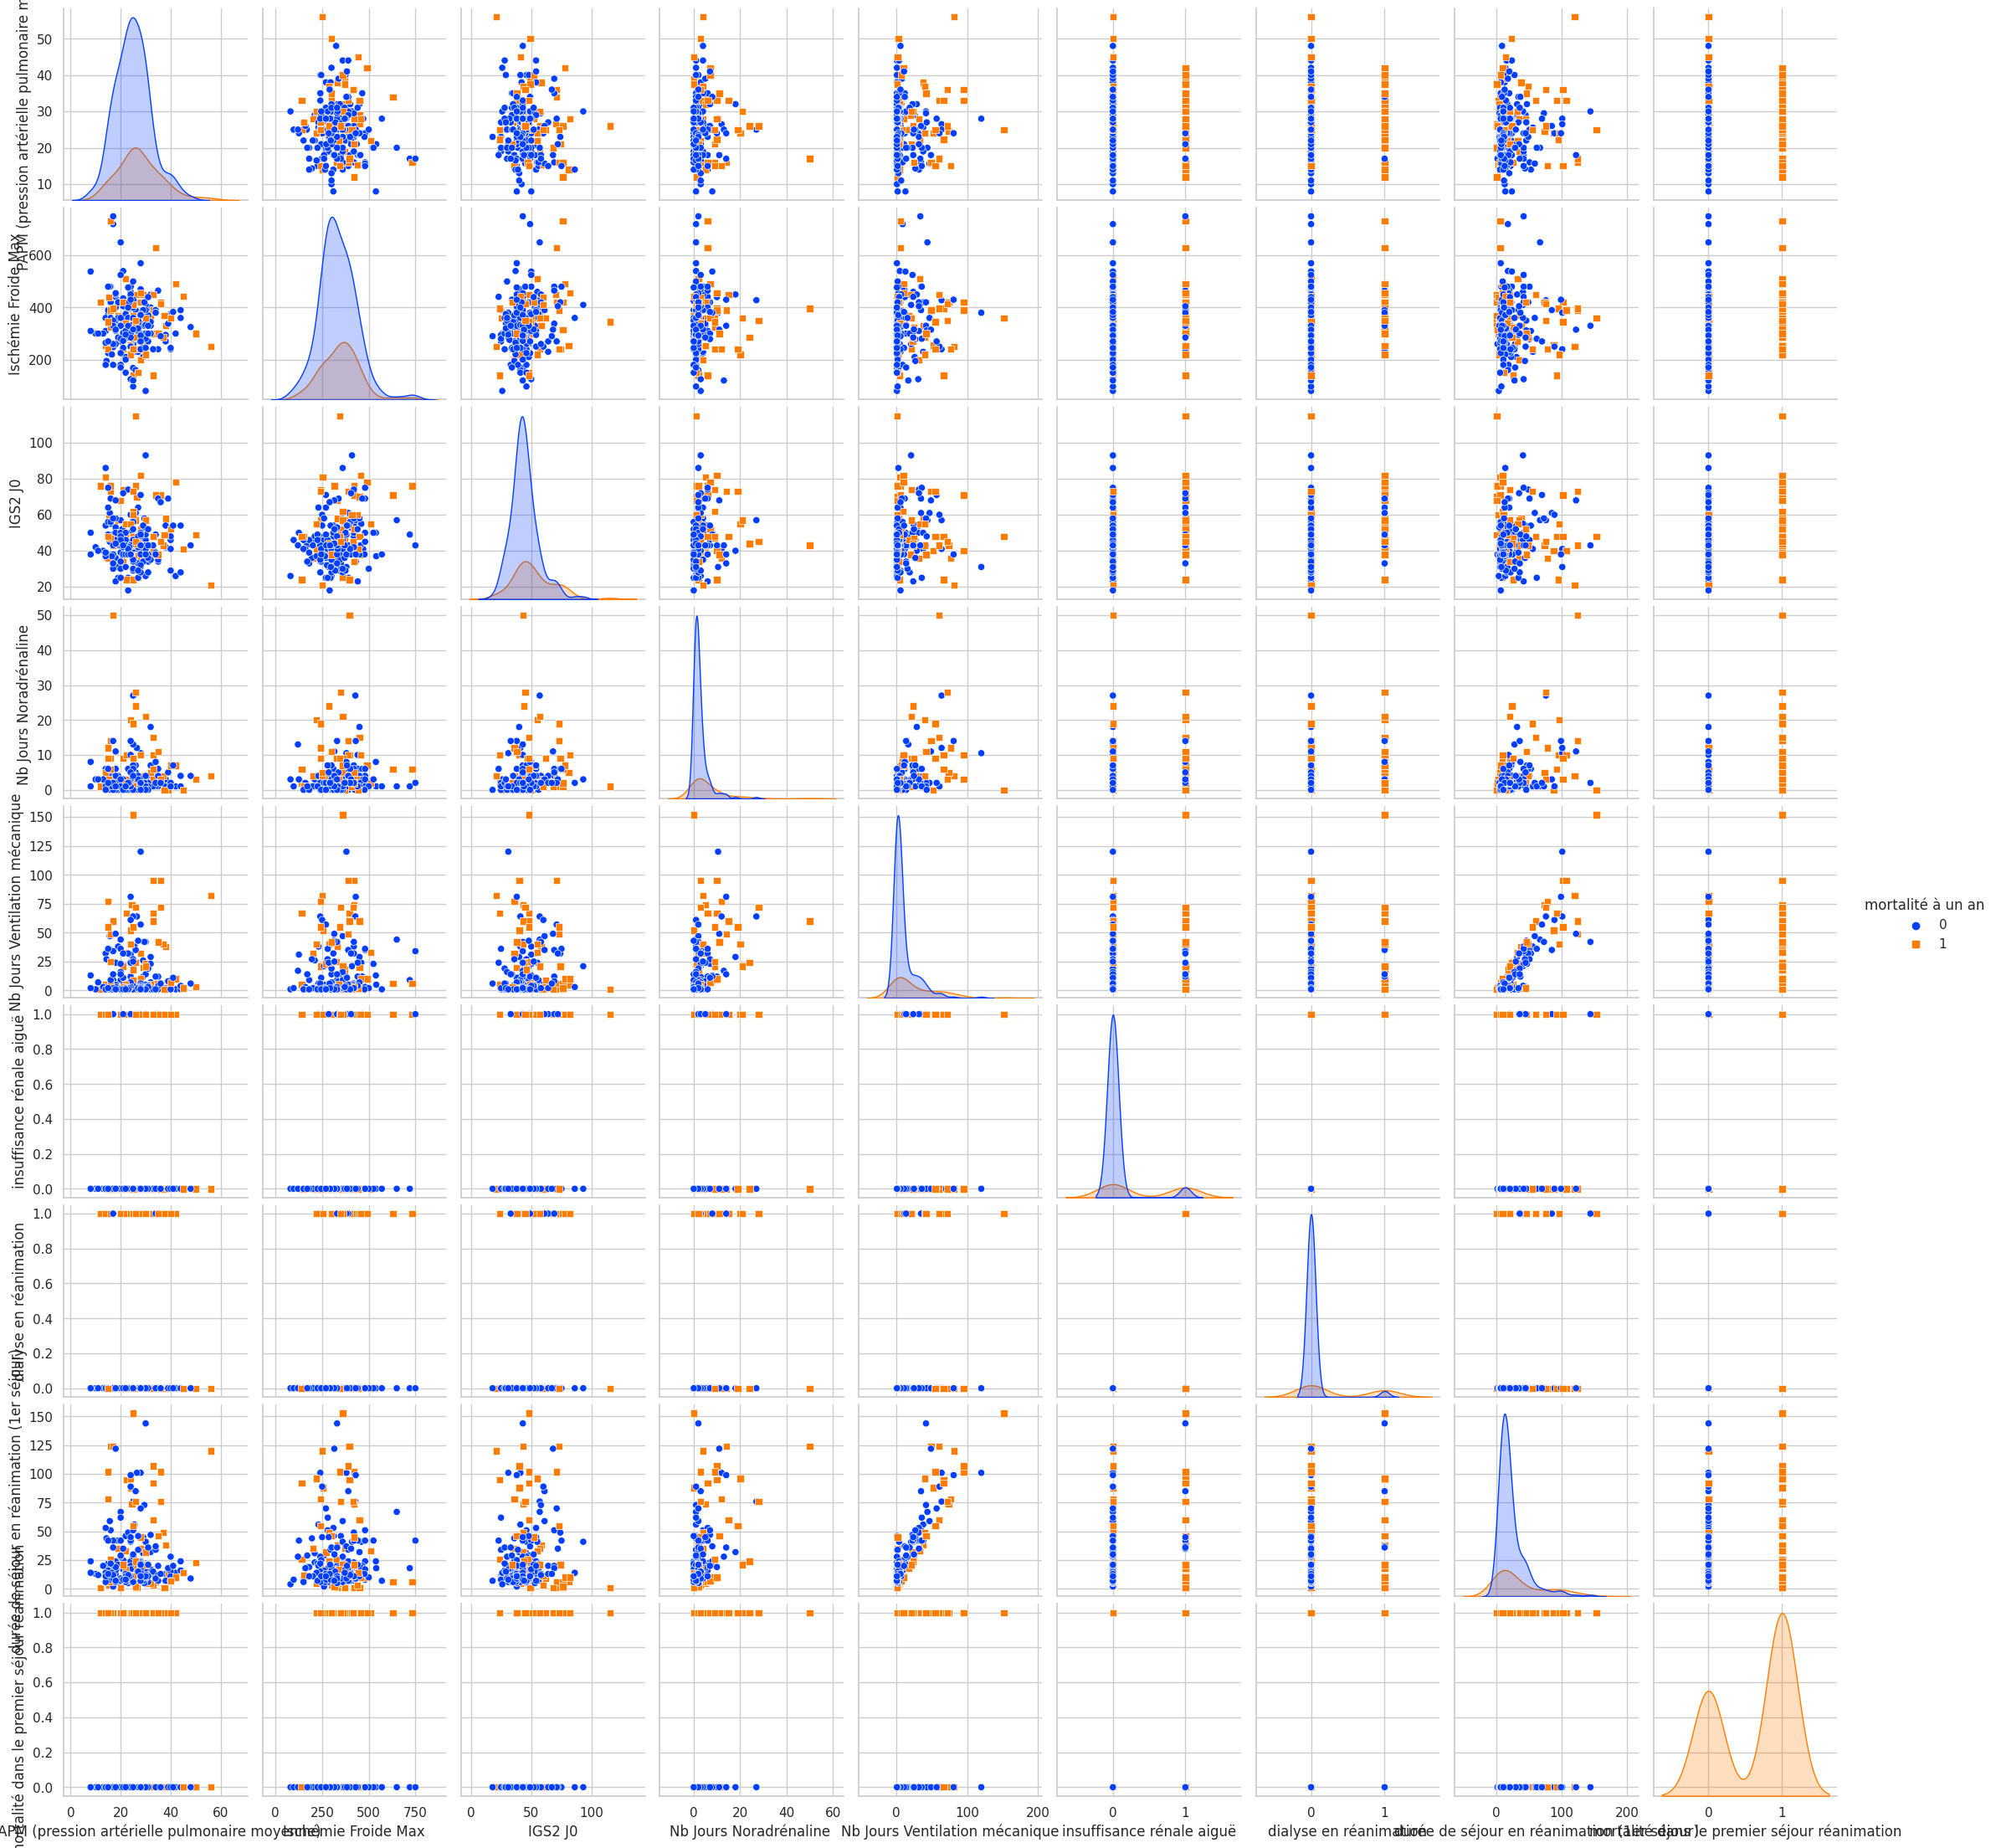

In [61]:
sns.pairplot(data, hue = 'mortalité à un an', markers=["o", "s"], vars = top_features, palette = sns.color_palette("bright", 10))

In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [63]:
X = data[top_features]
y = data.iloc[:,-1]


In [64]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))

In [65]:
print(num_before, num_after)

{0: 189, 1: 63} {0: 188, 1: 151}


In [66]:
list(num_before.values())

[189, 63]

In [69]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

new_data.columns =['PAPM (pression artérielle pulmonaire moyenne)',
 'Ischémie Froide Max',
 'IGS2 J0',
 'Nb Jours Noradrénaline ',
 'Nb Jours Ventilation mécanique',
 'insuffisance rénale aiguë',
 'dialyse en réanimation',
 'durée de séjour en réanimation (1er séjour)',
 'mortalité dans le premier séjour réanimation','mortalité à un an']
new_data.head()

PAPM (pression artérielle pulmonaire moyenne)  Ischémie Froide Max  \
0                                           21.0                435.0   
1                                           23.0                300.0   
2                                           13.0                300.0   
3                                           28.0                375.0   
4                                           36.0                290.0   

   IGS2 J0  Nb Jours Noradrénaline   Nb Jours Ventilation mécanique  \
0       42                      2.0                               1   
1       38                      0.0                               1   
2       40                      3.0                               3   
3       50                      2.0                               4   
4       67                      2.0                               6   

   insuffisance rénale aiguë  dialyse en réanimation  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   durée de séjour en réanimation (1er séjour)  \
0                                           18   
1                                            5   
2                                           20   
3                                           17   
4                                           13   

   mortalité dans le premier séjour réanimation  mortalité à un an  
0                                             0                  0  
1                                             0                  0  
2                                             0                  0  
3                                             0                  0  
4                                             0                  0

In [70]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

PAPM (pression artérielle pulmonaire moyenne)  Ischémie Froide Max  \
0                                           21.0                435.0   
1                                           23.0                300.0   
2                                           13.0                300.0   
3                                           28.0                375.0   
4                                           36.0                290.0   

   IGS2 J0  Nb Jours Noradrénaline   Nb Jours Ventilation mécanique  \
0       42                      2.0                               1   
1       38                      0.0                               1   
2       40                      3.0                               3   
3       50                      2.0                               4   
4       67                      2.0                               6   

   insuffisance rénale aiguë  dialyse en réanimation  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   durée de séjour en réanimation (1er séjour)  \
0                                           18   
1                                            5   
2                                           20   
3                                           17   
4                                           13   

   mortalité dans le premier séjour réanimation  
0                                             0  
1                                             0  
2                                             0  
3                                             0  
4                                             0

In [71]:

# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [117]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [118]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [77]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [78]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 77.94%


<Axes: >

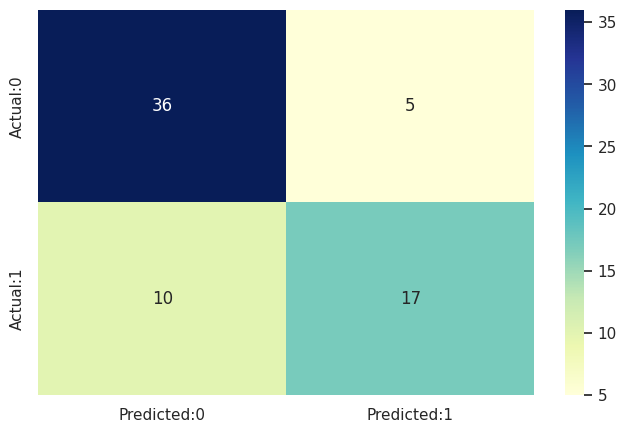

In [79]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [80]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.77      0.63      0.69        27

    accuracy                           0.78        68
   macro avg       0.78      0.75      0.76        68
weighted avg       0.78      0.78      0.77        68



In [81]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 69.39%


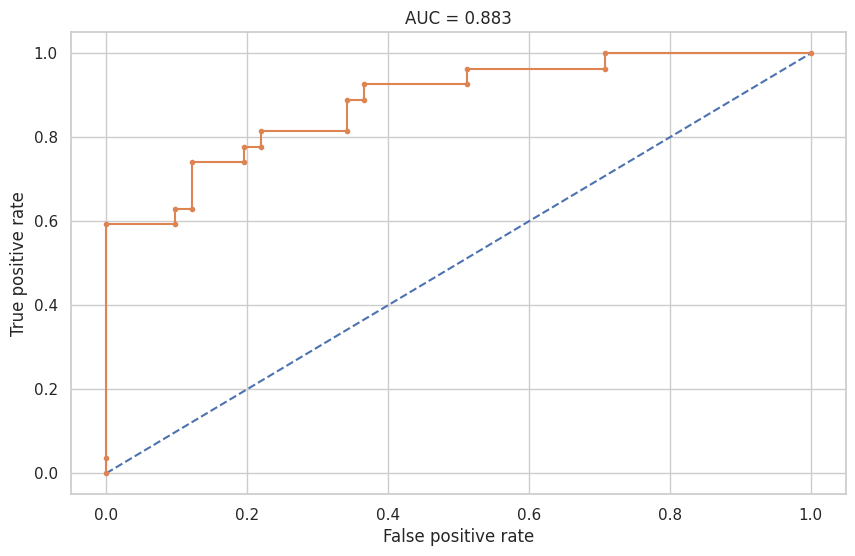

In [82]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()


In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)



In [85]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [86]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [87]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")


Using k-nearest neighbours we get an accuracy of 77.94%


<Axes: >

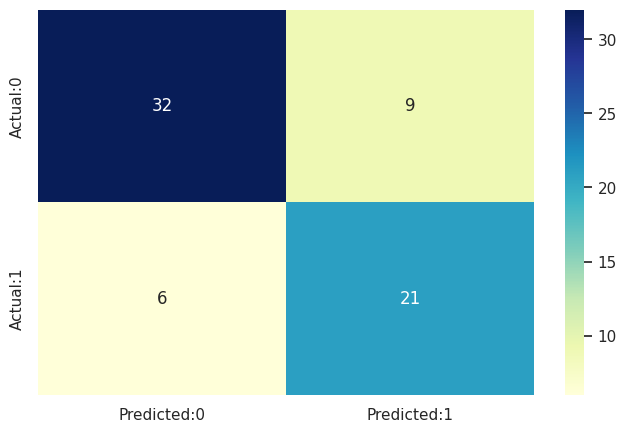

In [88]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [89]:
print(classification_report(y_test,knn_predict))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.70      0.78      0.74        27

    accuracy                           0.78        68
   macro avg       0.77      0.78      0.77        68
weighted avg       0.79      0.78      0.78        68



In [90]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 73.68%


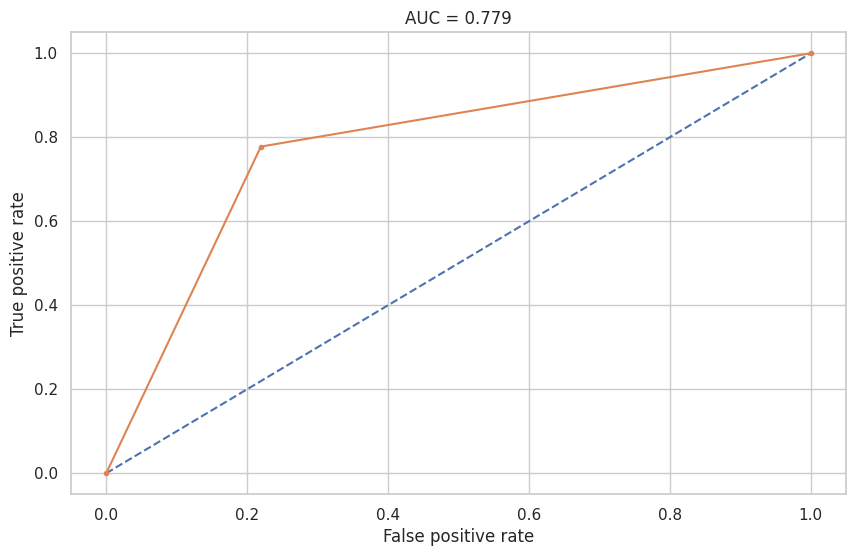

In [91]:
# ROC curve and AUC
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()


In [92]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [93]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [94]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}

In [95]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [96]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 67.65%


<Axes: >

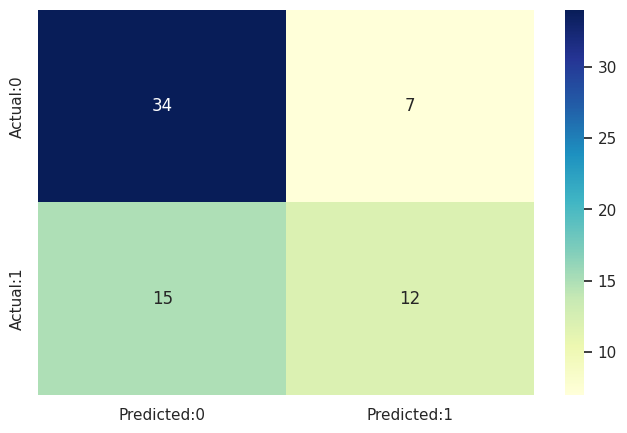

In [97]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [98]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        41
           1       0.63      0.44      0.52        27

    accuracy                           0.68        68
   macro avg       0.66      0.64      0.64        68
weighted avg       0.67      0.68      0.66        68



In [99]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 52.17%


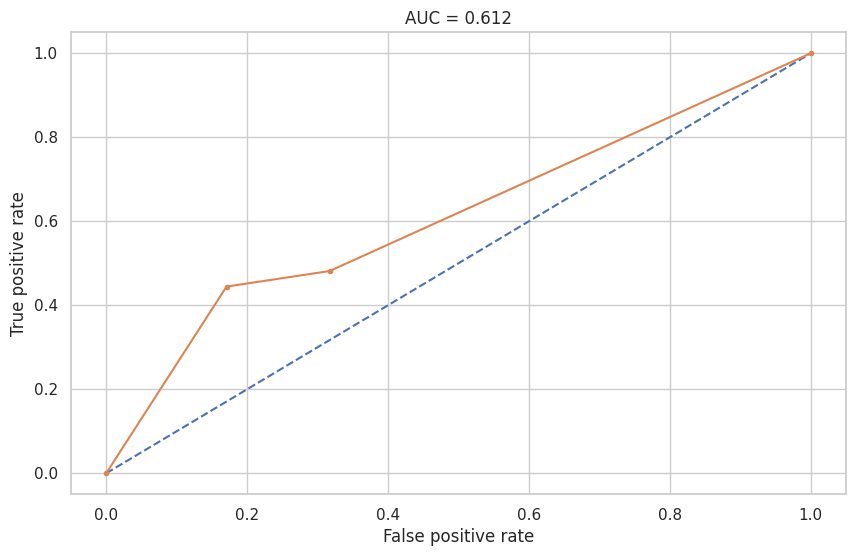

In [100]:
# ROC curve and AUC
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [101]:
from sklearn.svm import SVC

In [102]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)


In [103]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [104]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [105]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")


Using SVM we get an accuracy of 77.94%


<Axes: >

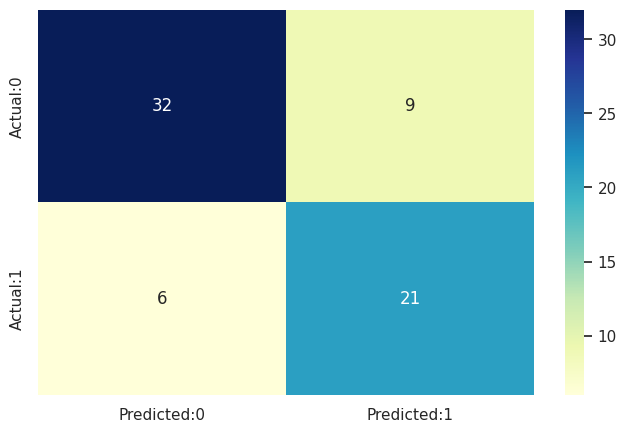

In [106]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [107]:


print(classification_report(y_test,svm_predict))



              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.70      0.78      0.74        27

    accuracy                           0.78        68
   macro avg       0.77      0.78      0.77        68
weighted avg       0.79      0.78      0.78        68



In [108]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 73.68%


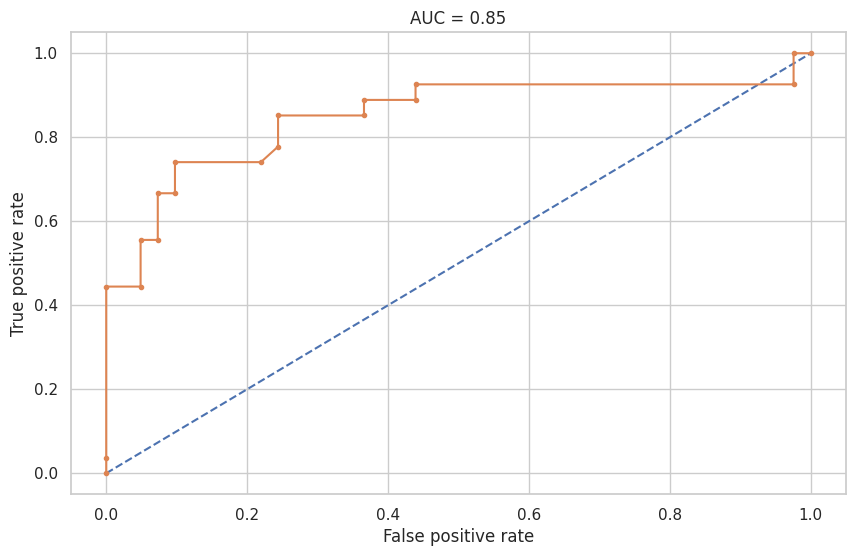

In [109]:
# ROC curve and AUC
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

In [110]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [111]:
comparison

Accuracy       AUC  F1 score
Logistic regression     0.779412  0.883469  0.693878
K-nearest neighbours    0.779412  0.779133  0.736842
Decision trees          0.676471  0.611563  0.521739
Support vector machine  0.779412  0.850497  0.736842

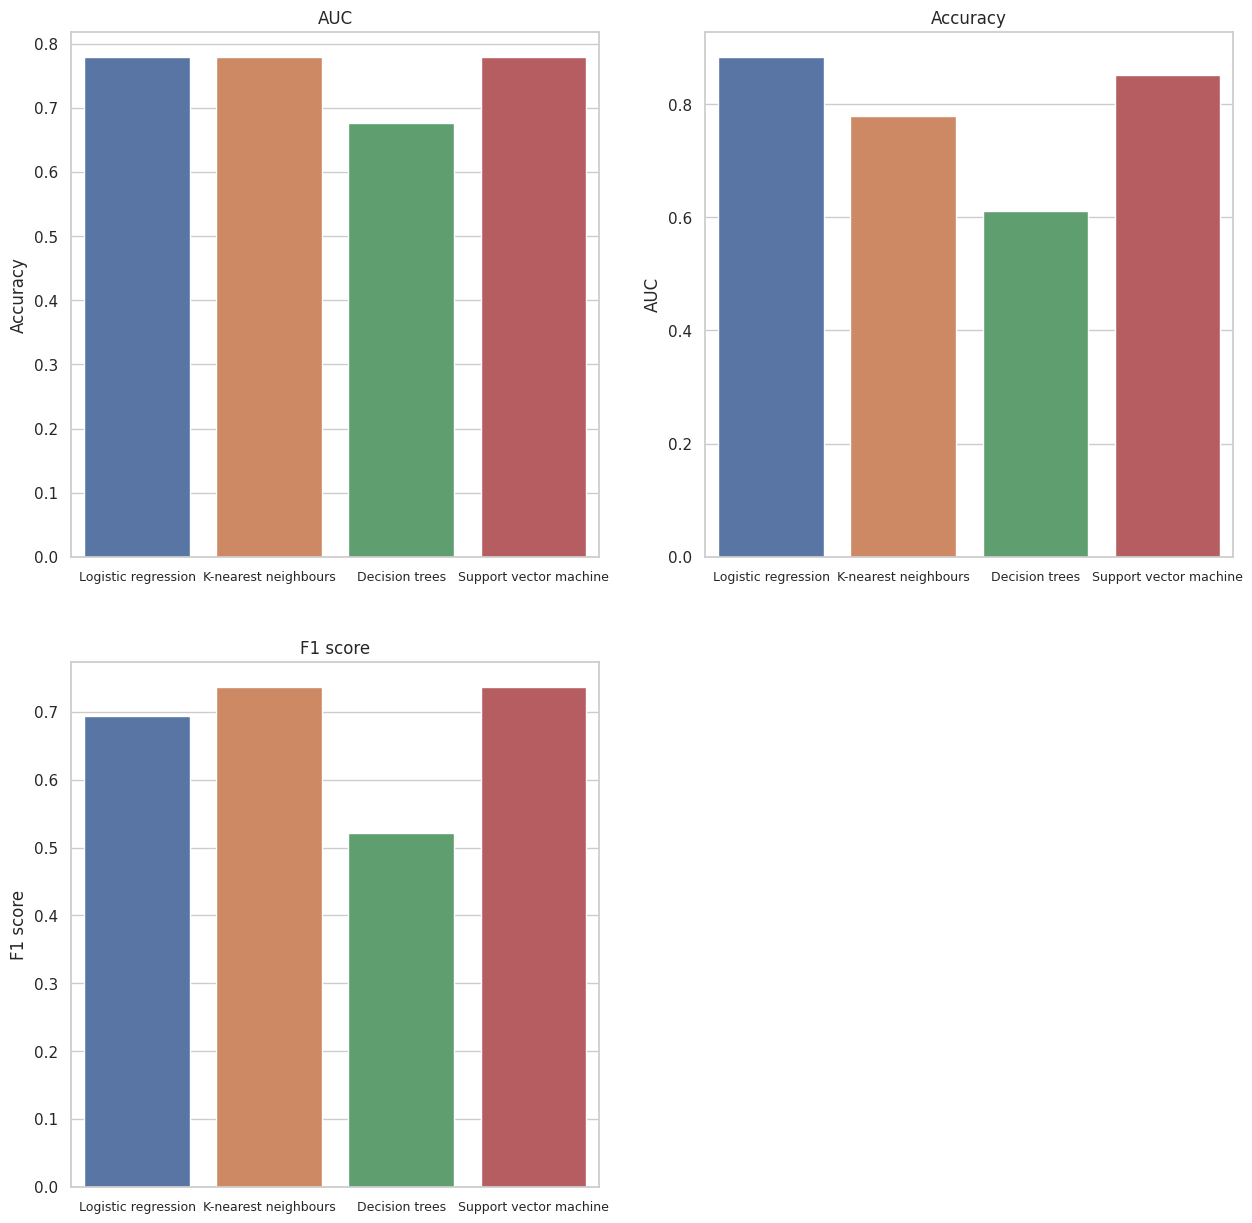

In [112]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
cv_results = cross_val_score(svm_clf, X, y, cv=5)

print (f"Cross-validated scores {cv_results}")
print(f"The Cross Validation accuracy is: {round(cv_results.mean() * 100,2)}%")

Cross-validated scores [0.7254902  0.74509804 0.7        0.76       0.74      ]
The Cross Validation accuracy is: 73.41%


### PCA
* C'est une méthode de réduction des dimensions qui est utilisée de préférence pour un problème d'apprentissage non supervisé.


In [148]:
!pip install umap-learn
!pip install umap-learn[plot]

In [149]:
# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# UMAP
import umap
import umap.plot

In [150]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [155]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(271, 2)


PC1       PC2
0 -1.514731 -0.783770
1 -1.333042  0.768439
2 -0.977658 -1.213772
3 -1.163363 -0.282725
4 -0.391214  1.509671

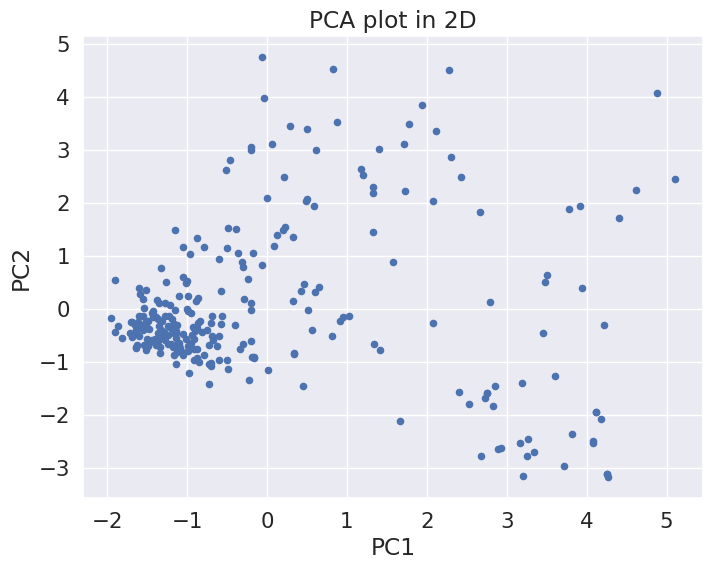

In [156]:
# PCA plot in 2D


# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=20)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [157]:
# KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(X_train)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

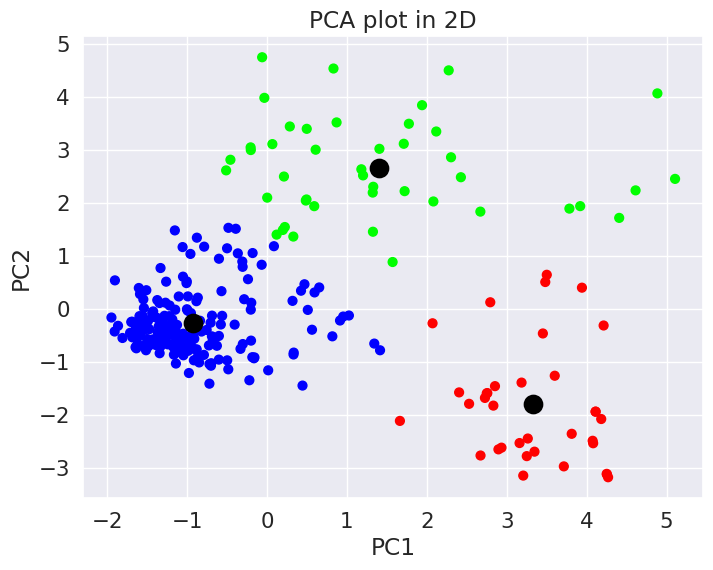

In [158]:
# PCA plot in 2D coloured by cluster

# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker=".", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [129]:
# Core
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px


In [132]:
# PCA plot in 3D

# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(new_data)

# 3D scatterplot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(new_data)), opacity = 1,
    title='PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=700, height=600
)
fig.show()

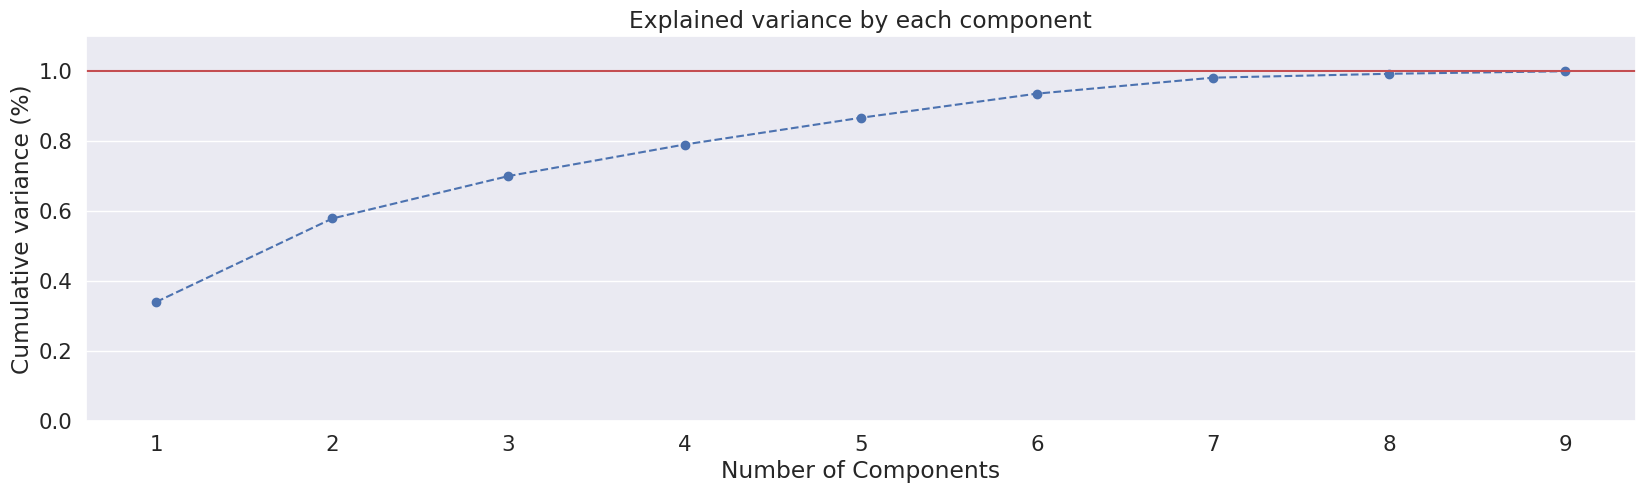

In [159]:
# PCA
pca_var = PCA()
pca_var.fit(X_train)

# Plot
plt.figure(figsize=(20,5))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X_train.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)


## t-SNE

In [160]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()


(271, 2)


tsne comp. 1  tsne comp. 2
0      9.253061     -5.324648
1      7.235734     -3.009524
2     -8.242411     -1.924951
3      5.807495     -4.828084
4      4.461929      3.921871

*t-SNE plot in 2D coloured by class*

Text(0, 0.5, 'tsne component 2')

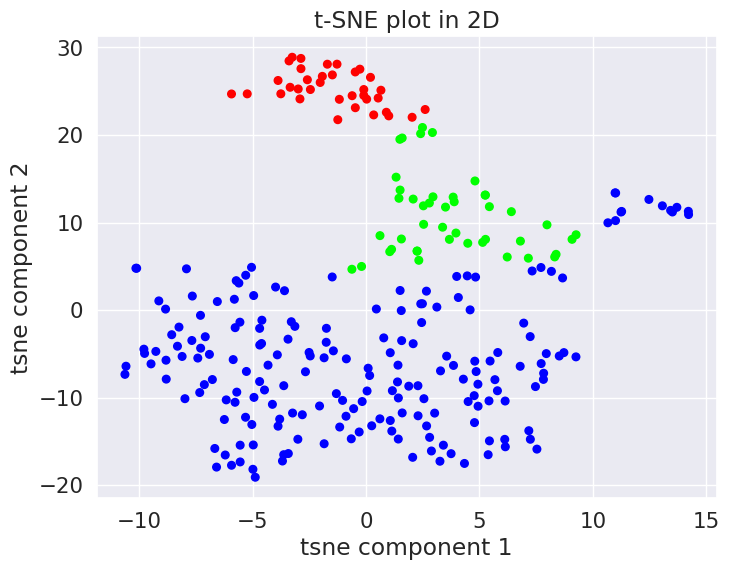

In [161]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=30)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

*t-SNE plot in 3D*

In [162]:
# t-SNE
tsne = TSNE(n_components=3)
components_tsne = tsne.fit_transform(X_train)

# 3D scatterplot
fig = px.scatter_3d(
    components_tsne, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X_train)), opacity = 1,
    title='t-SNE plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()

In [163]:
# UMAP
um=umap.UMAP()
X_fit = um.fit(X_train)           # we'll use X_fit later
X_umap = um.transform(X_train)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

(271, 2)


umap comp. 1  umap comp. 2
0      9.881009      9.150567
1      9.843068      8.248318
2     11.993642     11.200649
3     10.048872      9.028299
4     10.800421      5.130212

*UMAP plot in 2D coloured by clusters*

Text(0, 0.5, 'umap component 2')

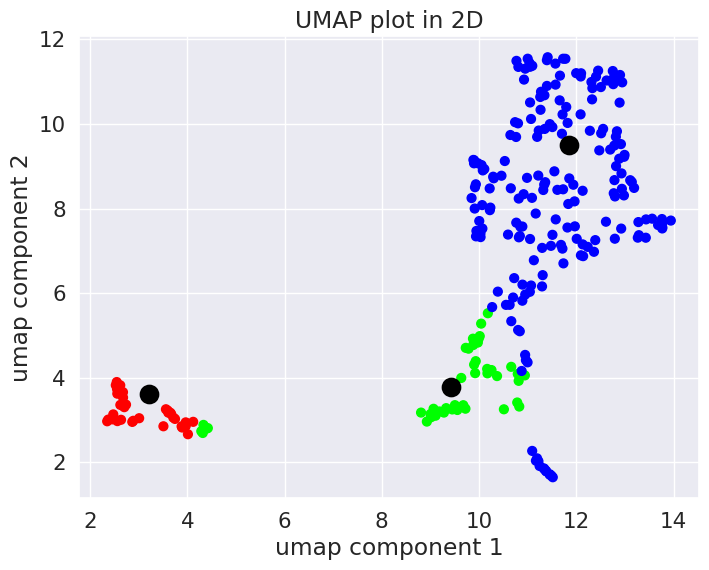

In [164]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Centroids
centroids_umap = um.transform(centroids)
plt.scatter(x=centroids_umap[:,0], y=centroids_umap[:,1], marker=".", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

*UMAP plot in 3D*

In [165]:
# UMAP
um = umap.UMAP(n_components=3)
components_umap = um.fit_transform(X_train)

# 3D scatterplot
fig = px.scatter_3d(
    components_umap, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X_train)), opacity = 1,
    title='UMAP plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()

*UMAP connectivity plot*

/usr/local/lib/python3.10/dist-packages/datashader/transfer_functions/__init__.py:326: RuntimeWarning:

invalid value encountered in true_divide



<Axes: >

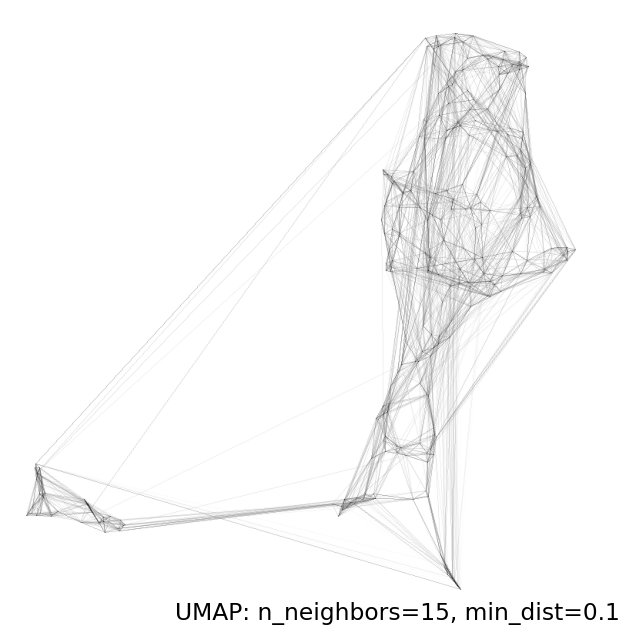

In [166]:
# Connectivity plot
umap.plot.connectivity(X_fit, show_points=True)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:885: UserWarning:

Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!

/usr/local/lib/python3.10/dist-packages/datashader/transfer_functions/__init__.py:326: RuntimeWarning:

invalid value encountered in true_divide



<Axes: >

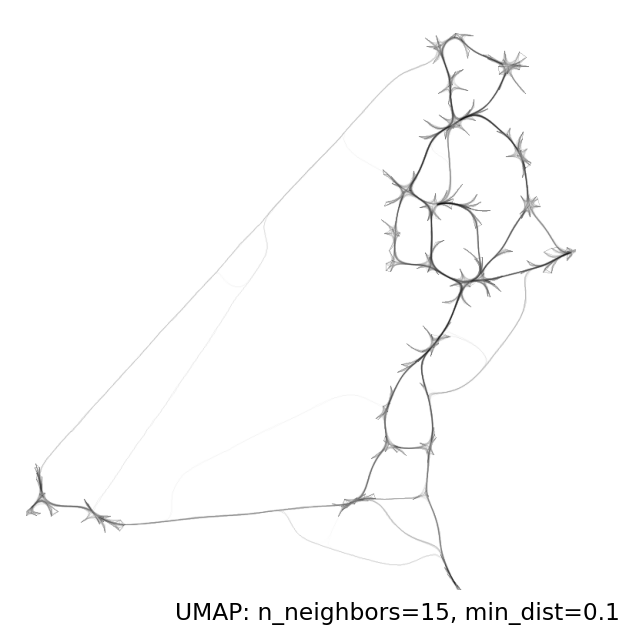

In [167]:
# Bundling can provide a simplified view of the connections
umap.plot.connectivity(X_fit, show_points=True, edge_bundling='hammer')

In [173]:
%matplotlib inline

import pandas as pd
import networkx as nx



In [174]:
new_data.head()

PAPM (pression artérielle pulmonaire moyenne)  Ischémie Froide Max  \
0                                           21.0                435.0   
1                                           23.0                300.0   
2                                           13.0                300.0   
3                                           28.0                375.0   
4                                           36.0                290.0   

   IGS2 J0  Nb Jours Noradrénaline   Nb Jours Ventilation mécanique  \
0       42                      2.0                               1   
1       38                      0.0                               1   
2       40                      3.0                               3   
3       50                      2.0                               4   
4       67                      2.0                               6   

   insuffisance rénale aiguë  dialyse en réanimation  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   durée de séjour en réanimation (1er séjour)  \
0                                           18   
1                                            5   
2                                           20   
3                                           17   
4                                           13   

   mortalité dans le premier séjour réanimation  mortalité à un an  
0                                             0                  0  
1                                             0                  0  
2                                             0                  0  
3                                             0                  0  
4                                             0                  0

In [170]:
 # This scales each column to have mean=0 and standard deviation=1
SS=StandardScaler()
# Apply scaling
#X=pd.DataFrame(SS.fit_transform(new_data), columns=new_data.columns)
X=pd.DataFrame(new_data, columns=new_data.columns)



In [175]:
# Ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

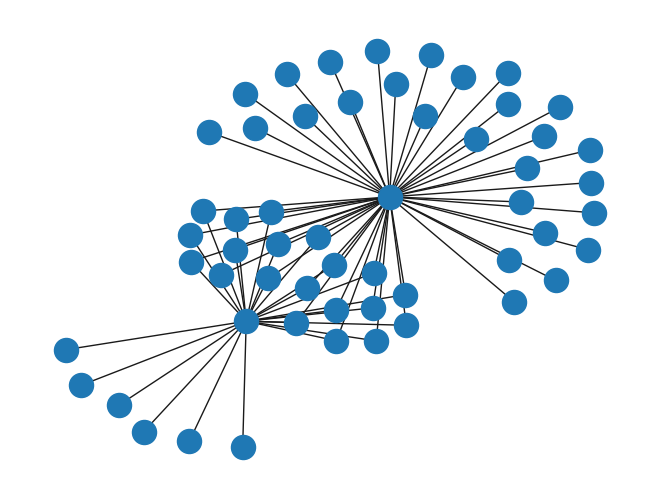

In [190]:
g= nx.from_pandas_edgelist(X,source= 'BMI (body mass index)', target='mortalité à un an')
nx.draw(g)

In [177]:
# Make a list of the clubs, we'll use it later
clubs = list(X['mortalité à un an'].unique())
clubs

[0, 1]

In [178]:
df= data[['Age', 'mortalité à un an']]
X=pd.DataFrame(data, columns=data.columns)

In [179]:
Y=X[['Age','mortalité à un an']]



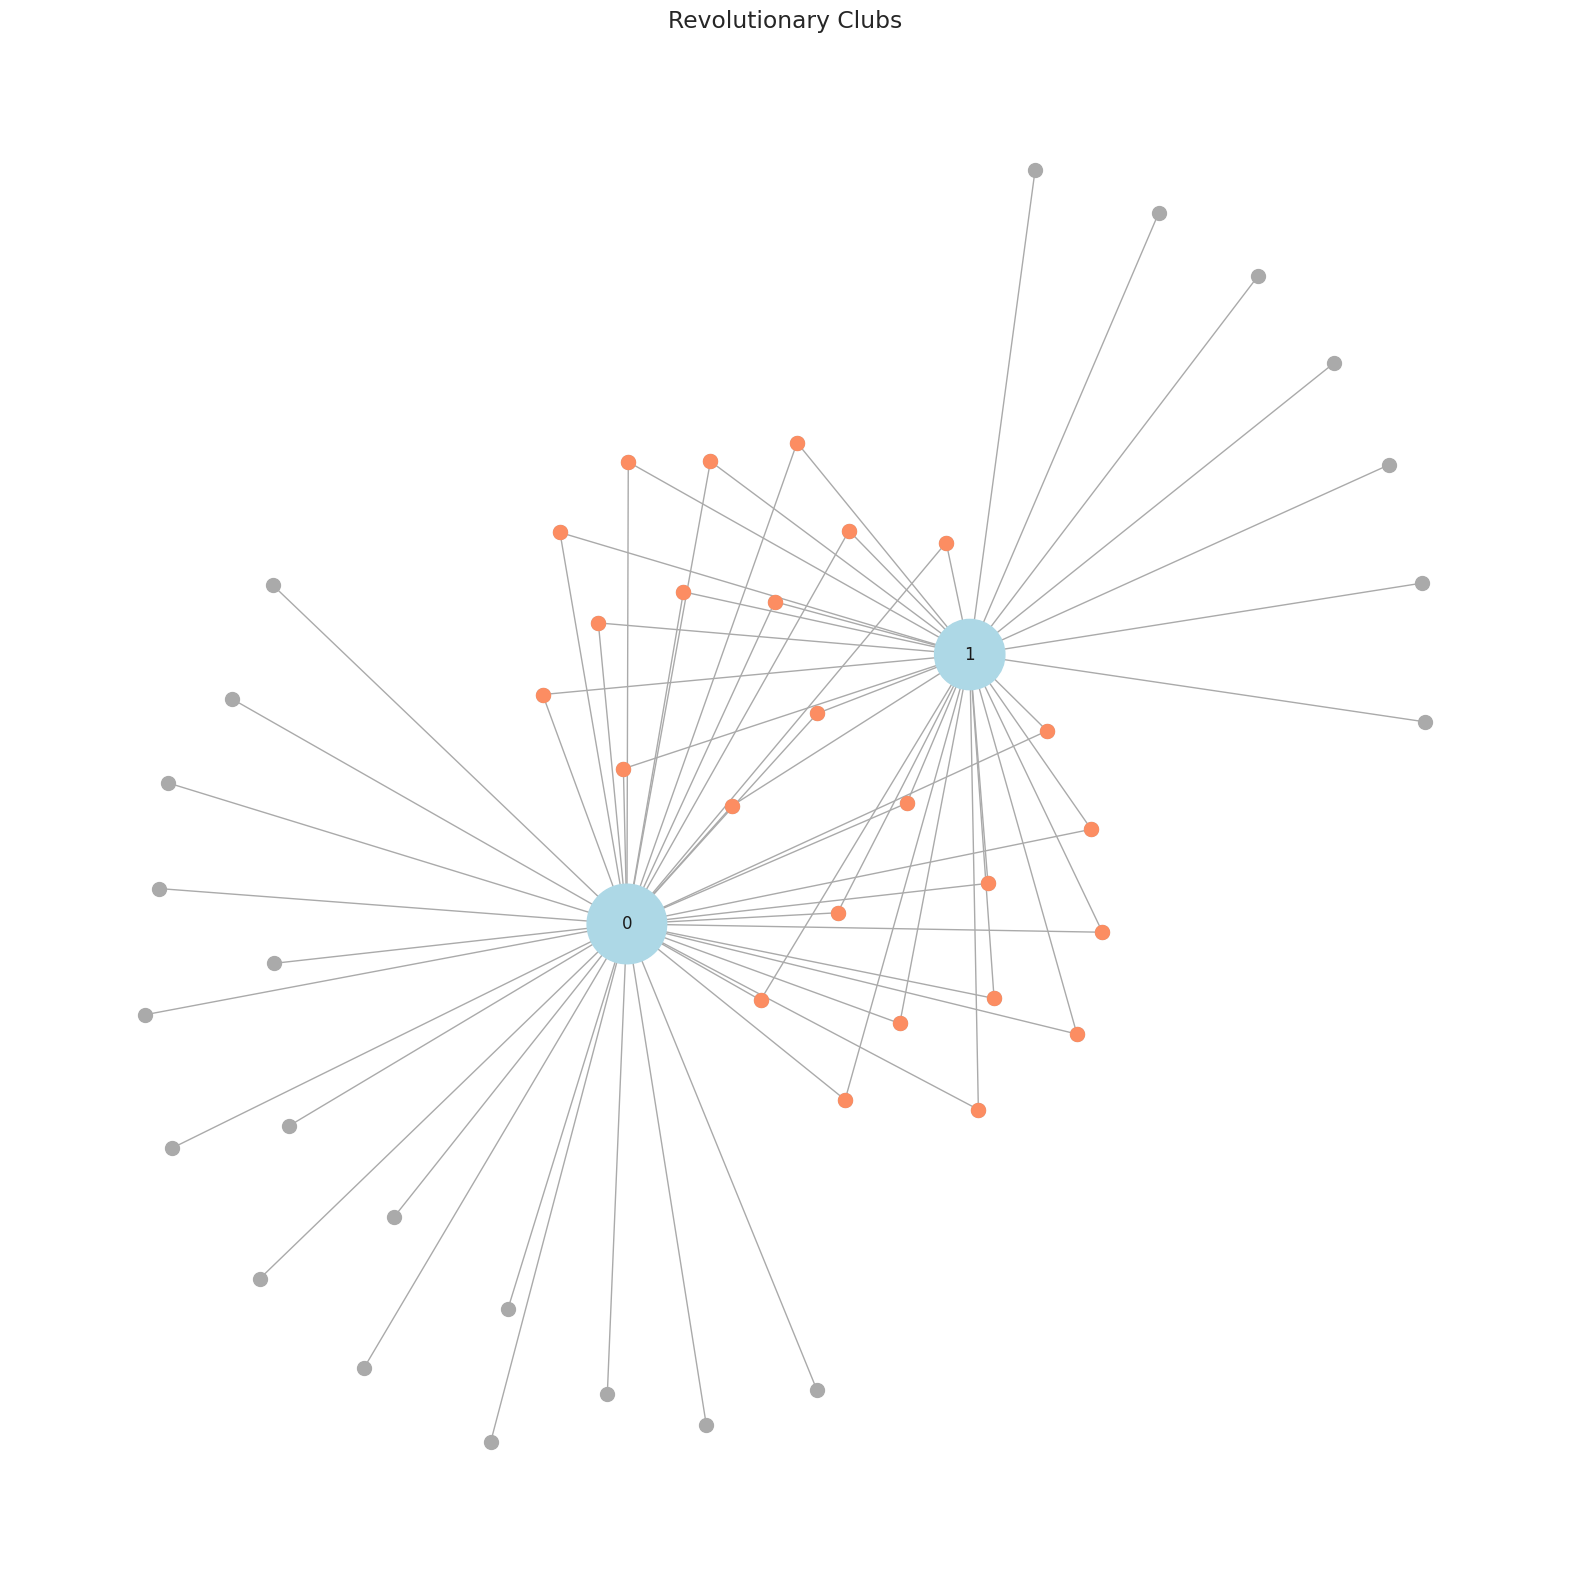

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

# 1. Create the graph

#g= nx.from_pandas_edgelist(X,source= 'BMI (body mass index)', target='mortalité à un an')
g=nx.from_pandas_edgelist(Y , source='Age', target='mortalité à un an')
#g = nx.from_pandas_dataframe(df, source='name', target='club')

# 2. Create a layout for our nodes
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

clubs = [node for node in g.nodes() if node in Y['mortalité à un an'].unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in Y['mortalité à un an'].unique()]
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, node_color='lightblue')

people = [node for node in g.nodes() if node in Y['Age'].unique()]
nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in Y['Age'].unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

club_dict = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=club_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

In [181]:
df= data[['Age', 'mortalité à un an']]
X_df=pd.DataFrame(df, columns=df.columns)


In [182]:
 # This scales each column to have mean=0 and standard deviation=1
SS=StandardScaler()
# Apply scaling
X_df=pd.DataFrame(SS.fit_transform(df), columns=df.columns)

In [183]:
g = nx.from_pandas_edgelist(X_df, source='Age', target='mortalité à un an')


In [184]:
df= data[['Age', 'mortalité à un an']]
df

Age  mortalité à un an
0     52                  0
1     63                  0
2     45                  0
3     56                  0
4     63                  0
..   ...                ...
247   30                  0
248   60                  0
249   69                  0
250   56                  0
251   53                  0

[252 rows x 2 columns]

In [185]:
mycor = data .corr() # Matrice de corrélation non filtrée par les p-values

In [186]:
# Créer une matrice d'adjacence de type matrice de corrélation

mycor =new_data.corr() # Matrice de corrélation non filtrée par les p-values

import numpy as np

mycor2 = np.array(mycor) # Conversion de la matrice pandas en matrice array

labels = list(mycor.columns.values) # Conversion au format list des noms de variables

key_list = list( range(len(labels)))

dic = dict(zip(key_list, labels))

# Définir les couleurs en fonction des valeurs de corrélation (>0 : rouge, <0 : bleu)

import networkx as nx

G = nx.from_numpy_array(mycor2)


edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())


# Coloration conditionnelle

weights  = list(weights)

for i in range(len(weights)) :

	if weights[i] < 0 :

		weights[i] = "red"

	else :

		weights[i] = "blue"


weights = tuple(weights)

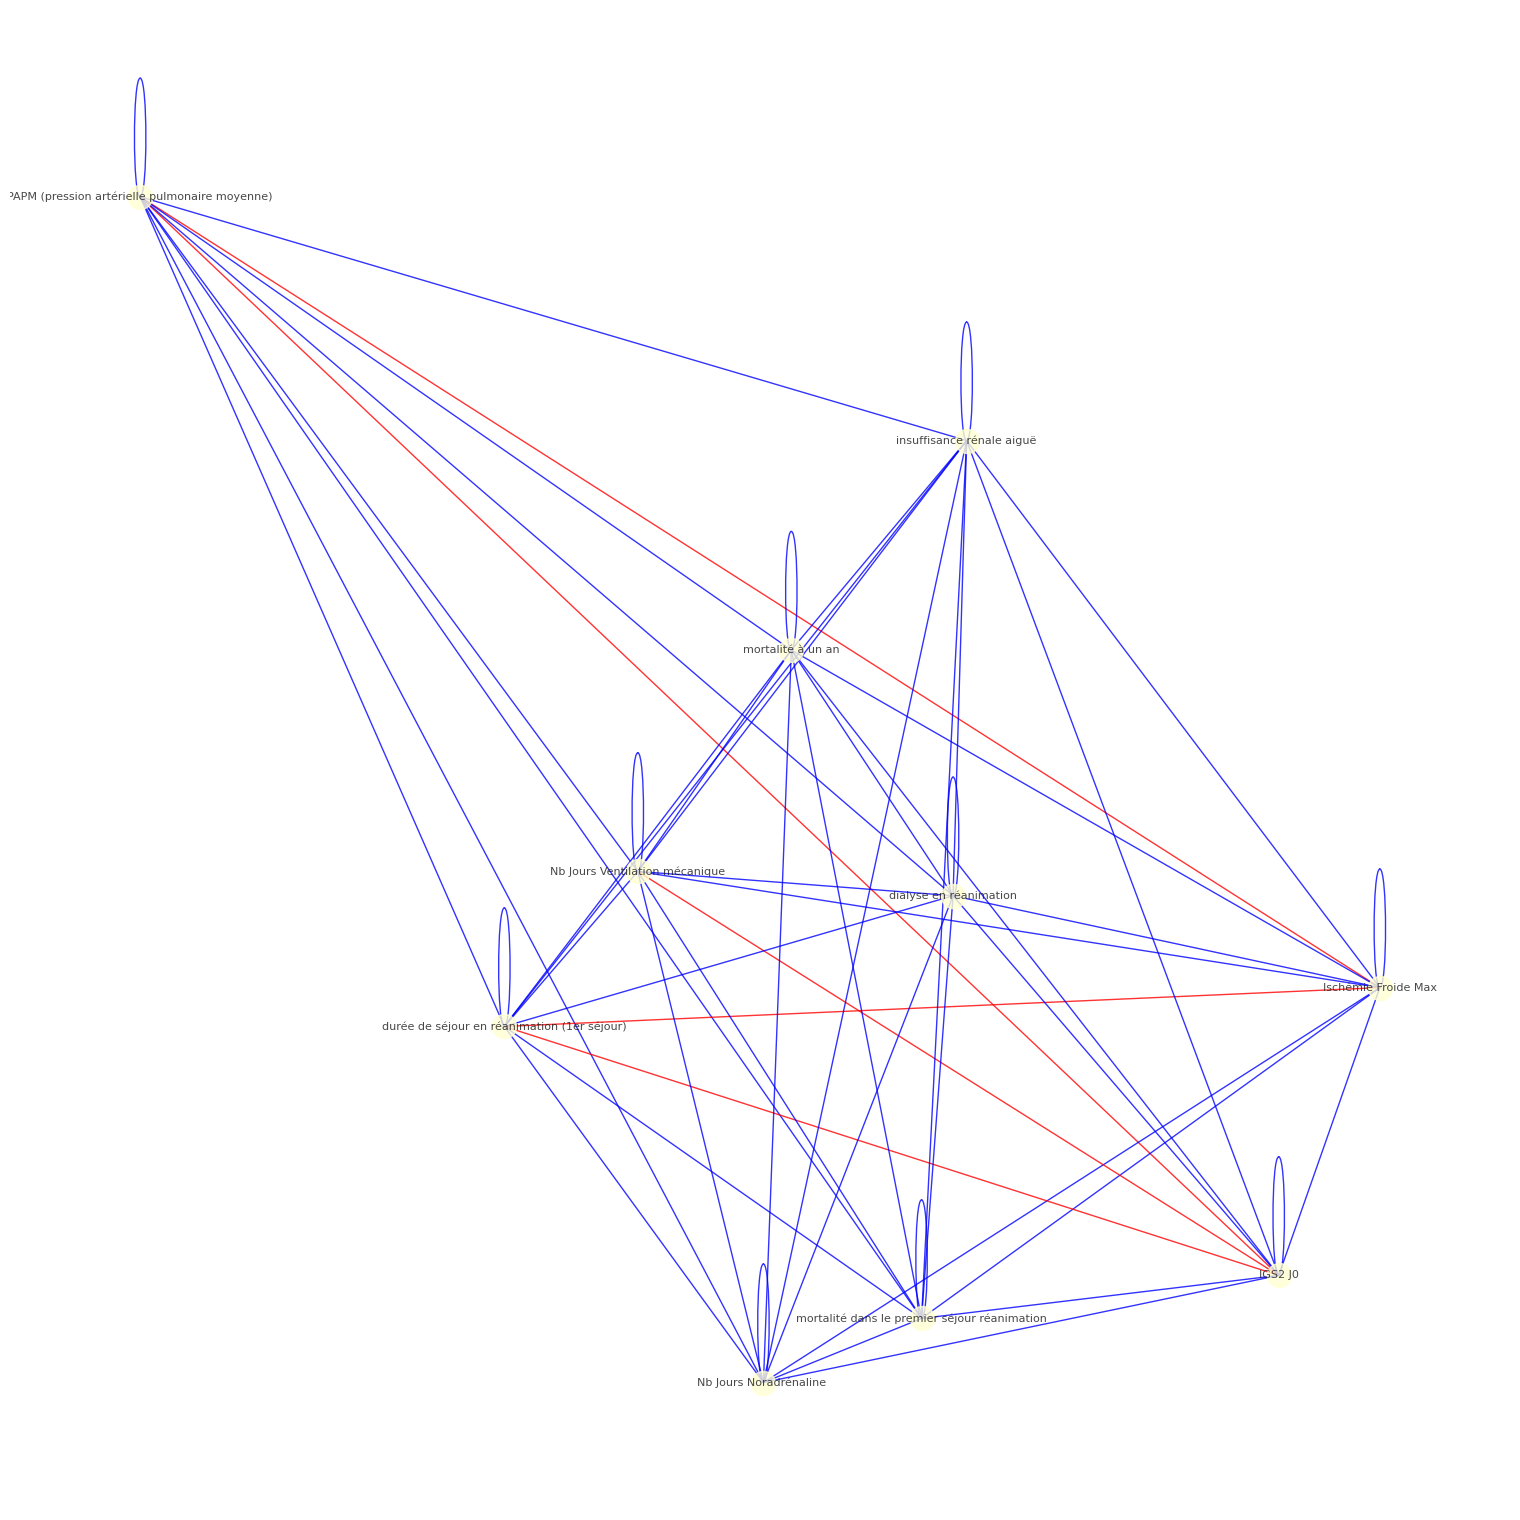

In [187]:
# Tracer le réseau


# Nommer les labels

G = nx.relabel_nodes(G, dic)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

nx.draw(G,with_labels=True,font_size=8, alpha=0.8, node_color="#FFFFD3", edge_color=weights)


plt.show()

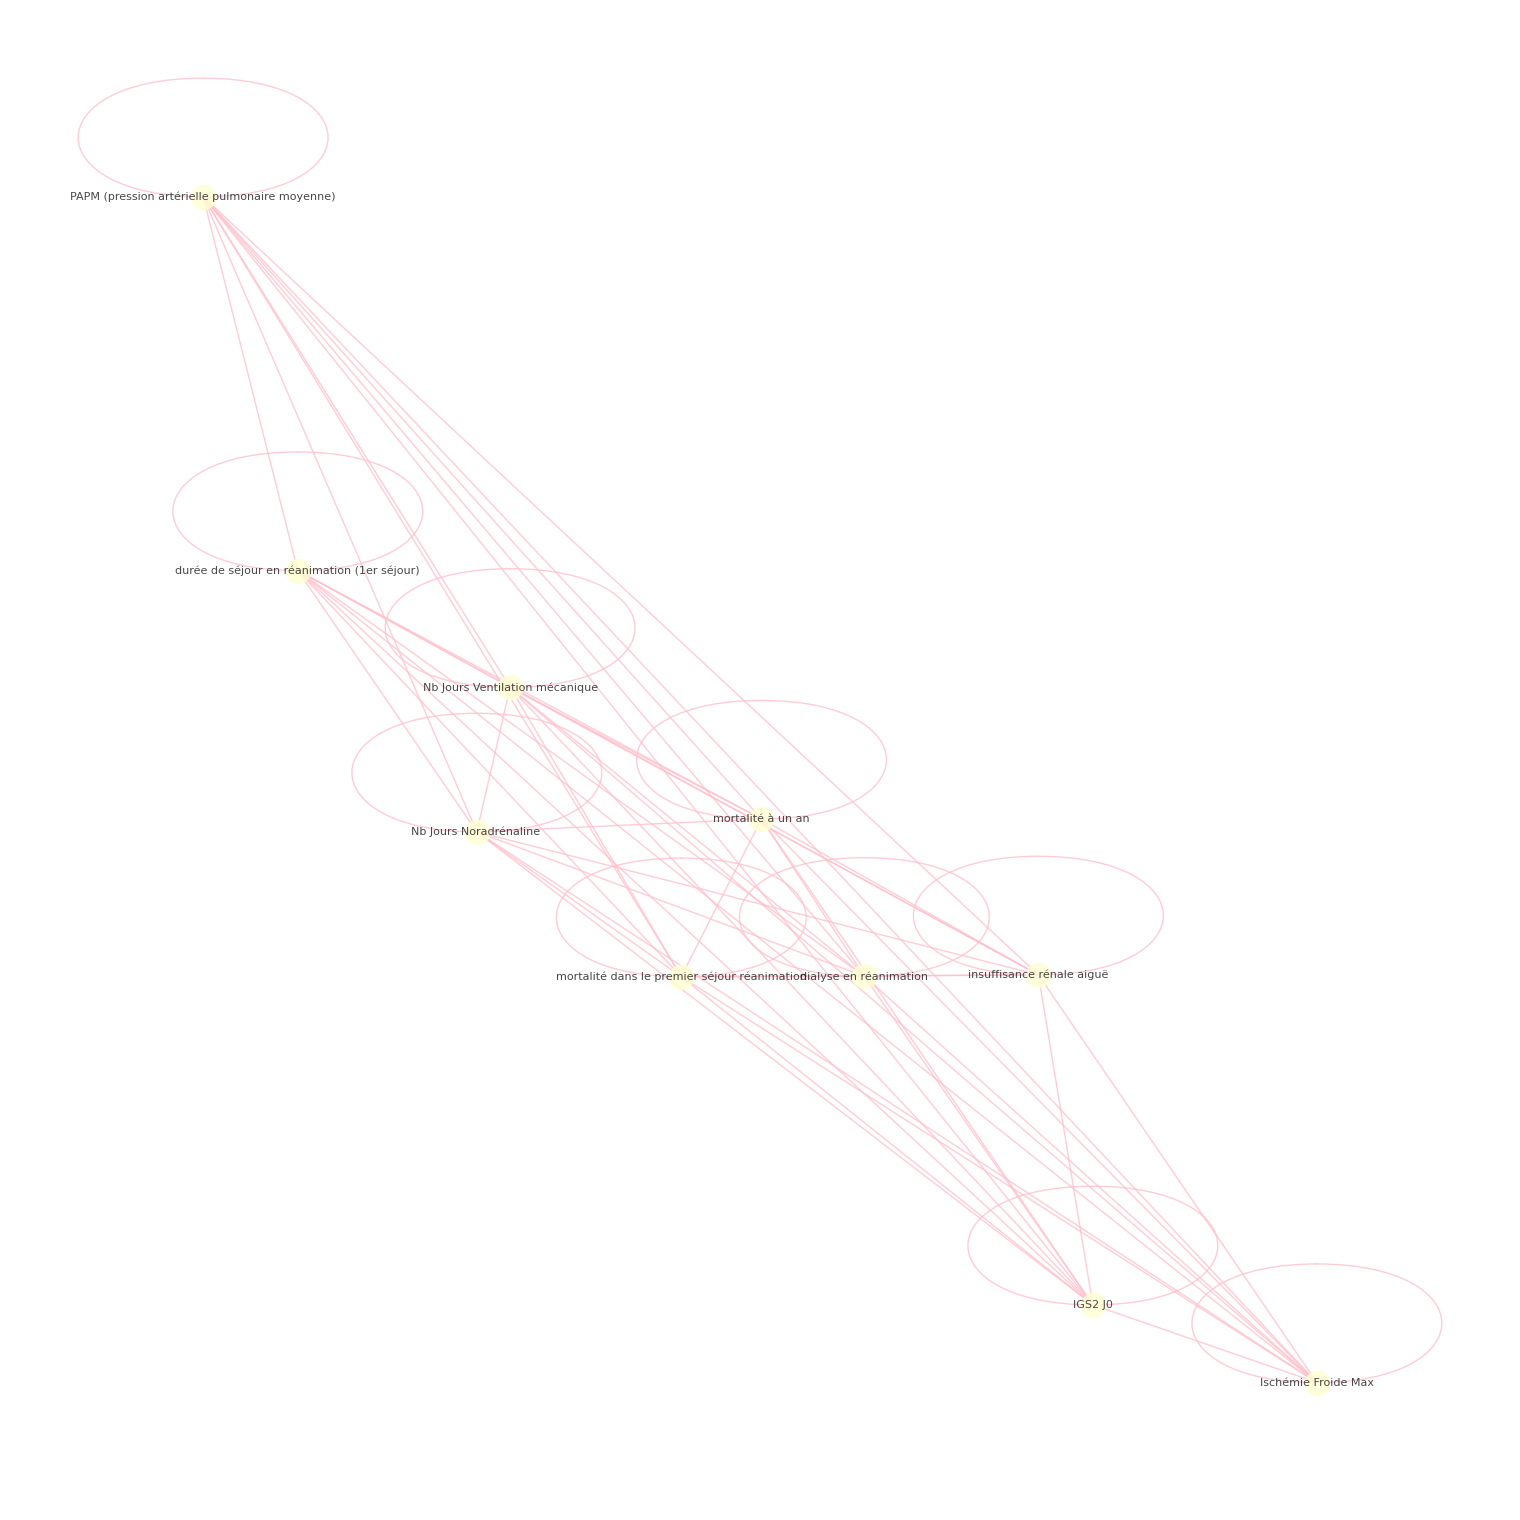

In [188]:
categorieA = ['BMI (body mass index)',
 'PAPM (pression artérielle pulmonaire moyenne)',
 'Ischémie Froide Max',
 'IGS2 J0',
 'Nb Jours Noradrénaline ',
 'Nb Jours Ventilation mécanique',
 'insuffisance rénale aiguë',
 'dialyse en réanimation',
 'durée de séjour en réanimation (1er séjour)',
 'mortalité dans le premier séjour réanimation']

# Coloration conditionnelle

weights  = list(weights)

import numpy as np

for i in range(len(edges)) :

    #if edge[0].isin(categorieA) :

    edge = edges[i]

    if (np.isin(edge[0], categorieA)) and (np.isin(edge[1], categorieA)) :

        weights[i] = 'orange'

    else :

        weights[i] = 'pink'

weights = tuple(weights)

# Tracer le réseau


# Nommer les labels

G = nx.relabel_nodes(G, dic)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

nx.draw(G,with_labels=True,font_size=8, alpha=0.8, node_color="#FFFFD3", edge_color=weights)

plt.show()